# A - Word Embedding
## Introduction
Pour l'instant, deux approches ont été présentées pour transformer des données textuelles en données numériques dans le but d'effectuer des tâches de Machine Learning: Bag of Words (BoW) et Term Frequency-Inverse Document Frequency (TF-IDF).

Cependant, ces méthodes souffrent de 2 problèmes majeurs:

La représentation vectorielle de chaque document du corpus est relativement grande. En effet, la taille du vecteur est en fait égale à la taille de tout le vocabulaire du corpus. Avec autant de caractéristiques, les algorithmes de Machine Learning ont des difficultés à s'entraîner et identifier les dimensions les plus pertinentes.
Les méthodes conduisent à une perte de la signification contextuelle des mots. Cela représente un problème sérieux car certains mots peuvent avoir plusieurs sens ou être utilisés de manière métaphorique. Par exemple, 'hot' dans 'hot weather' n'a pas la même signification que dans 'hot topic'.  

Dans ce contexte, nous allons introduire la représentation vectorielle des mots pour résoudre un problème de classification.

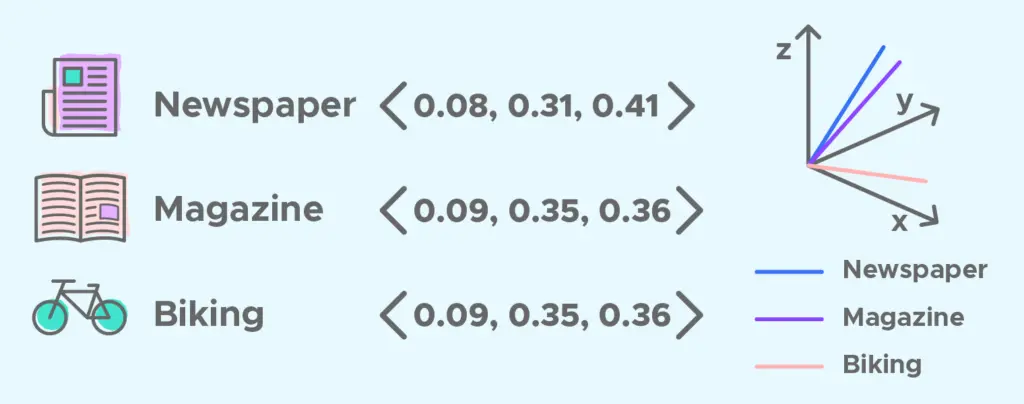

Compétences requises
Module Text Mining
Keras
## 1. One hot Encoding - Bow - TF-IDF
La représentation vectorielle la plus classique des mots est le one hot encoding utilisée dans les approches BoW ou TF-IDF. Une dimension est allouée pour chaque mot du vocabulaire. En effet, chaque mot du vocabulaire est représenté comme un vecteur binaire avec toutes ses valeurs nulles à l'exception de l'index du mot.

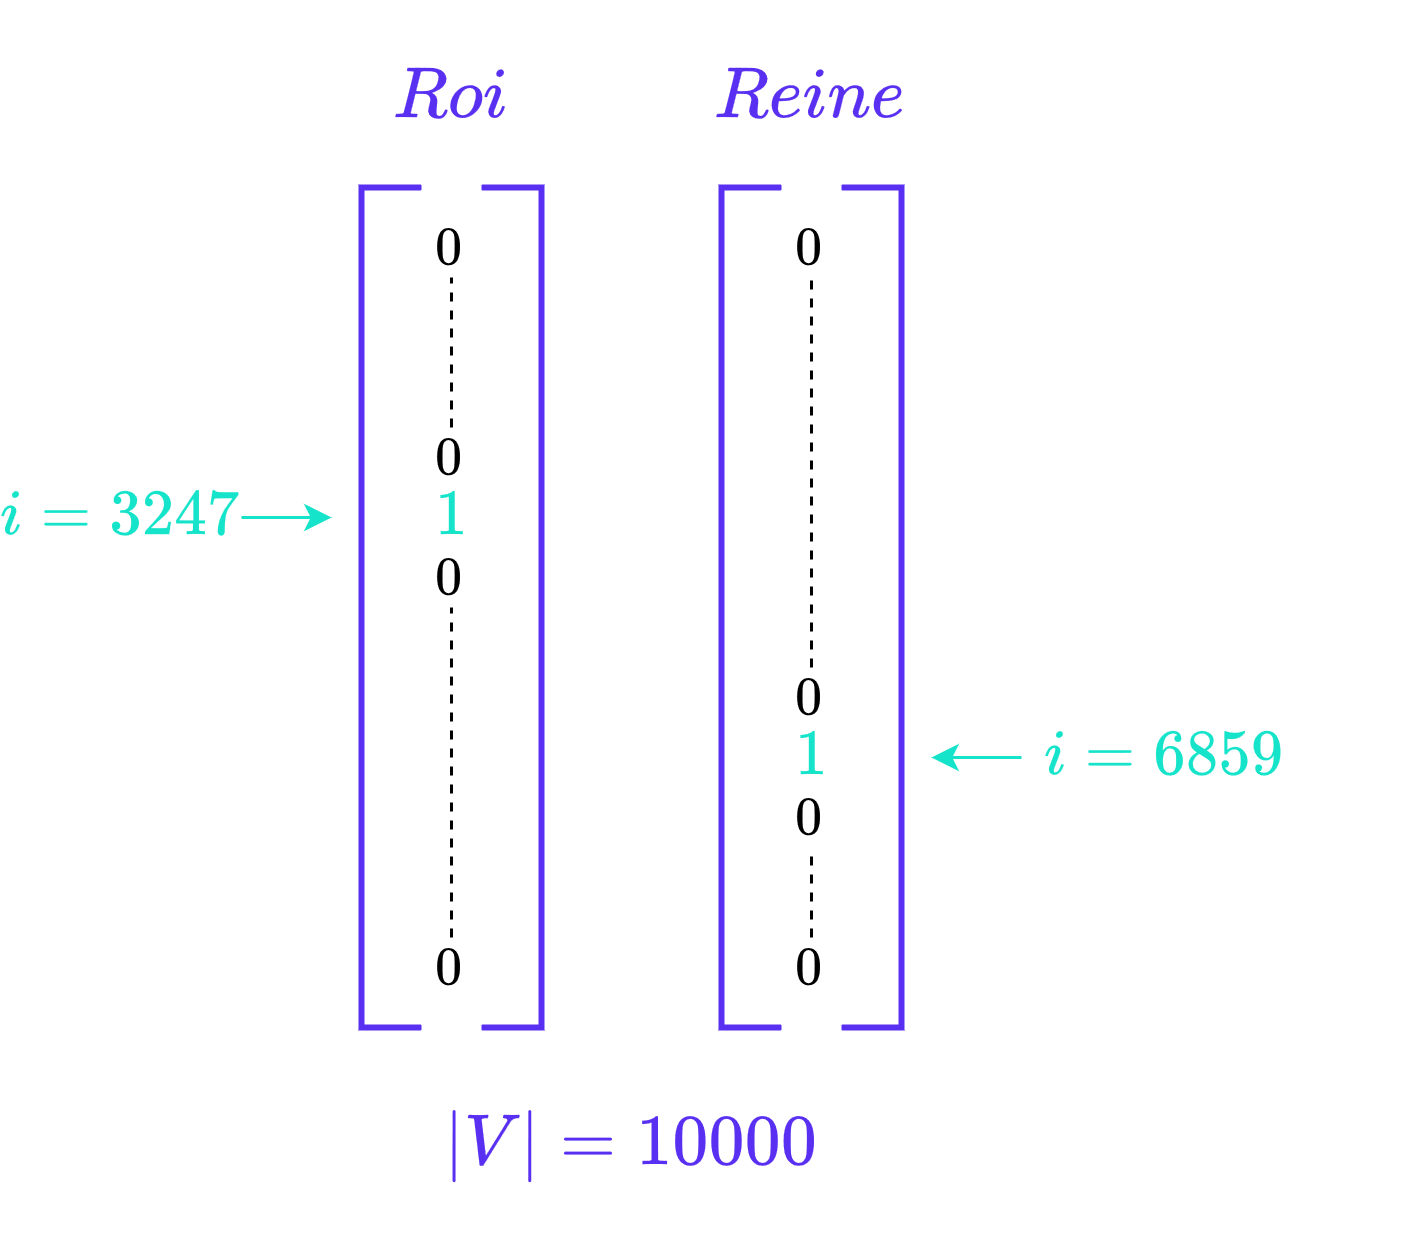

Pour illustrer l'encodage, prenons la phrase suivante :

"I think therefore I am"
À partir de cette phrase, on peut définir un dictionnaire du vocabulaire :

{'i': 0, 'think': 1, 'therefore': 2, 'am': 3}
La méthode consiste alors à représenter le mot du vocabulaire sous forme de vecteur de dimension 4 (taille du vocabulaire) qui a toutes ses valeurs nulles à l'exception de l'index du mot.

La fonction one_hot de tensorflow convertit l'index d'un mot en un vecteur binaire one hot de dimension depth.

(a) Importer le module tensorflow sous le nom tf.
(b) Définir le dictionnaire de la phrase "I think therefore I am".
(c) Afficher le vecteur one hot du mot 'think'.
(d) Quelle est la distance euclidienne entre deux mots différents ?

In [1]:
# Import tensorflow
import tensorflow as tf
# Dictionary
dictionary = {'i': 0, 'think': 1, 'therefore': 2, 'am': 3}
# One hot representation of "think"
tf.one_hot(dictionary['think'], 4).numpy()

# Distance : √2

array([0., 1., 0., 0.], dtype=float32)

(e) À partir de cette transformation, obtener la représentation BoW de la phrase suivante : "I think therefore I am"

In [2]:
def one_hot(word):
    return tf.one_hot(dictionary[word], 4).numpy()

one_hot('i') + one_hot('think') + one_hot('therefore') + one_hot('i') + one_hot('am')

array([2., 1., 1., 1.], dtype=float32)

Avec cette représentation, tous les mots ont la même distance et la même similitude. L'encodage one hot n'apporte donc qu'une information selon laquelle un mot est différent d'un autre.

## 2. Image Embedding
La dimension d'une image est définie par son nombre de pixel. Pour rappel, nous utilisons des convolutions pour l'extraction de caractéristiques plus pertinentes que la valeur des pixels. Par exemple, les noyaux servant à détecter les bords pourraient être utiles pour classifier certaines formes géométriques.

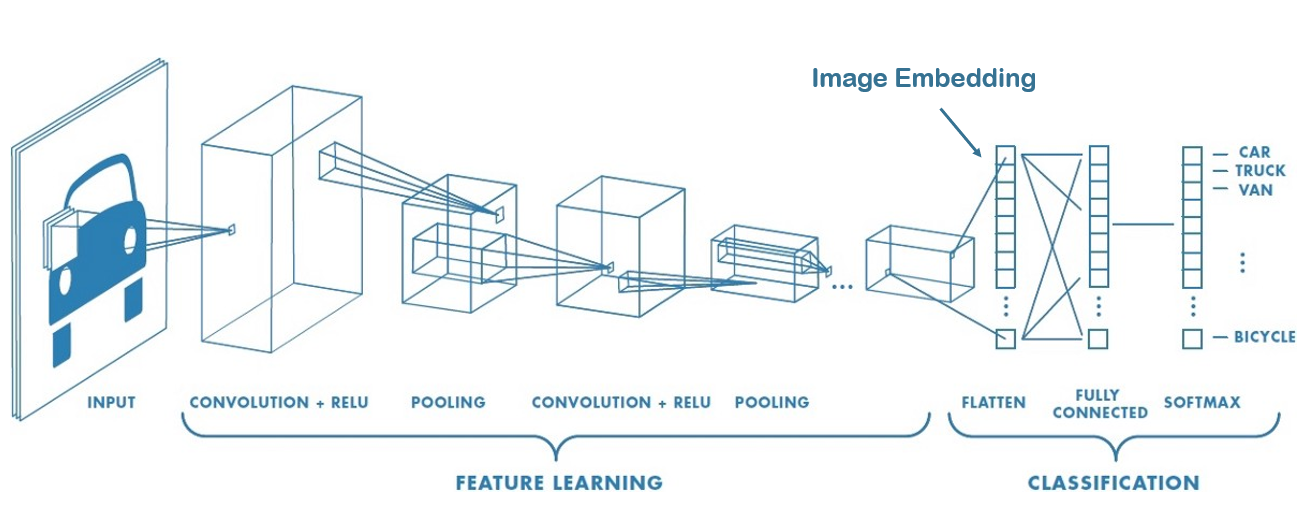

L'image embedding est capable en utilisant les convolutions/pooling d'encoder l'image et d'extraire des relations de linéarité entre des propriétés (style artistique, forme spécifique ...) et les nouvelles caractéristiques de notre image.

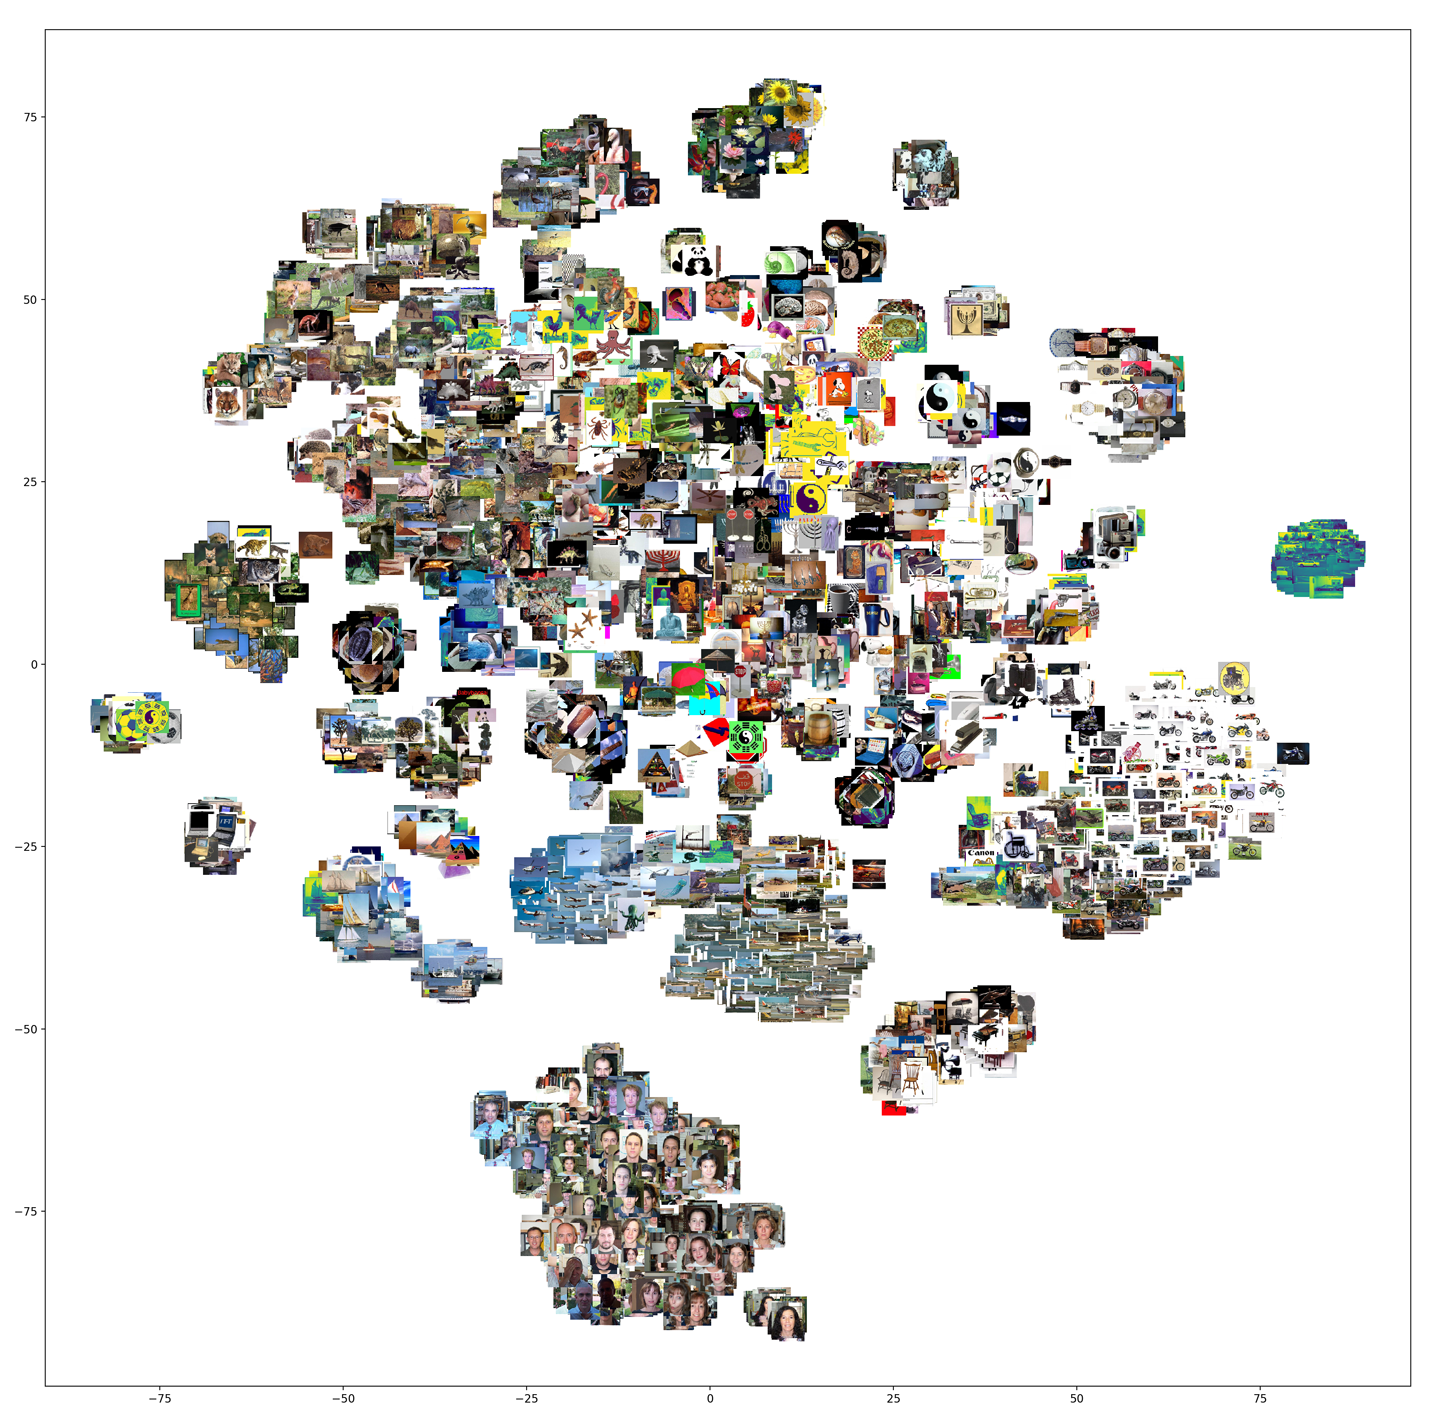

## 3. Word Embedding
Par analogie, le word embedding est capable en réduisant la dimension de capturer le contexte, la similarité sémantique et syntaxique (genre, synonymes, ...) d'un mot. Par exemple, on pourrait s'attendre à ce que les mots « chien » et « chat » soient représentés par des vecteurs relativement peu distants dans l'espace vectoriel où sont définis ces vecteurs.

Voici un exemple de Word Embedding que nous pourrions espérer avoir :

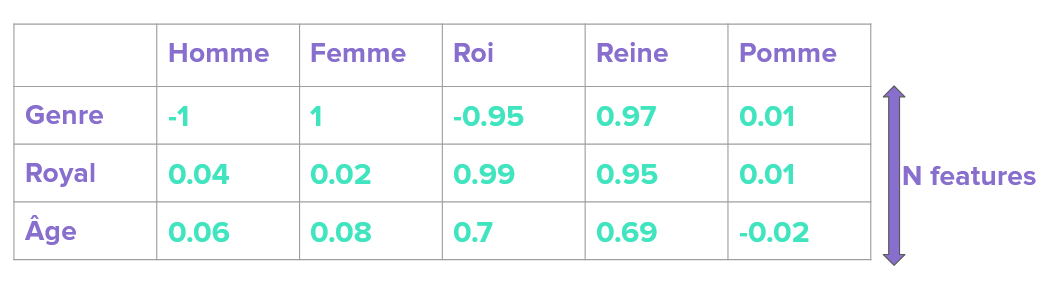

Evidemment nous n'allons pas créer ces vecteurs à la main, non seulement à cause du gigantesque travail de labélisation que cela demanderait mais aussi à cause du besoin de définir à priori certaines features capables de décrire l'intégralité des mots d'une langue.

Comme pour les images, nous souhaitons que ça soit le modèle qui choisisse les caractéristiques les plus pertinentes représentant le mot. Par exemple, la caractéristique "être vivant" pourrait être intéressante pour différencier "chien" et "ordinateur", et rapprocher "chien" et "chat".

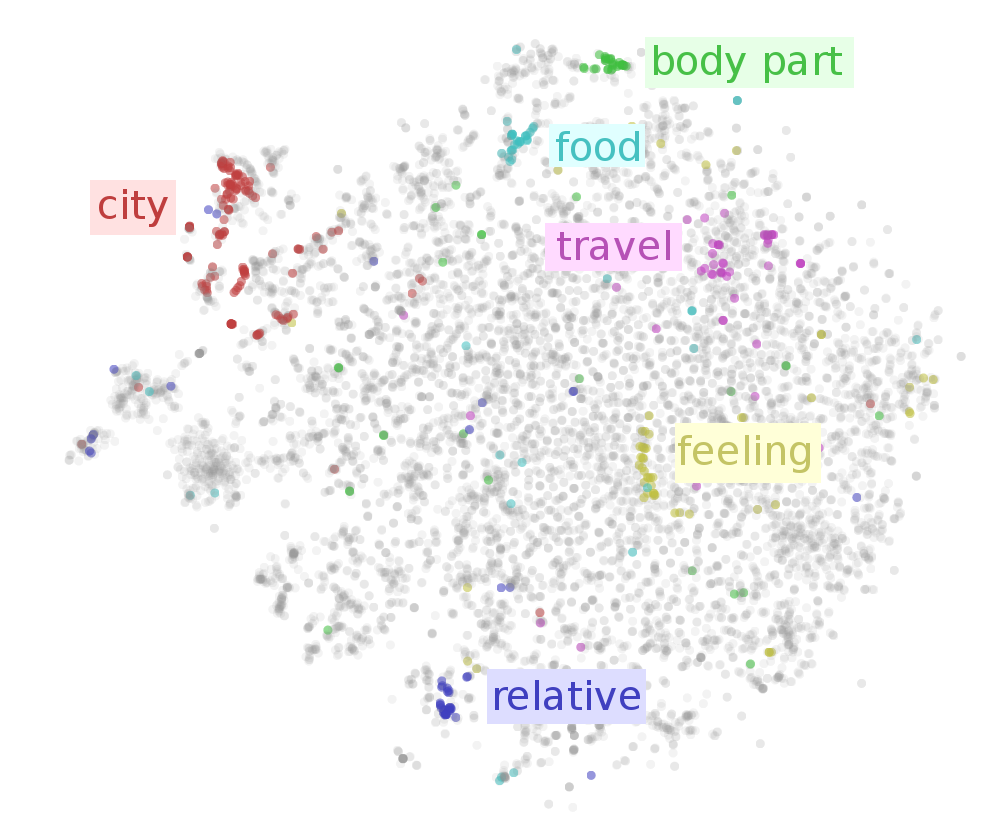

Matrice d'embedding
Une façon très simple de diminuer la taille d'un vecteur est de le multiplier par un matrice W :

h = W⋅X

 
Avec  XX de taille N et  W  de taille  [N,Nembedding]

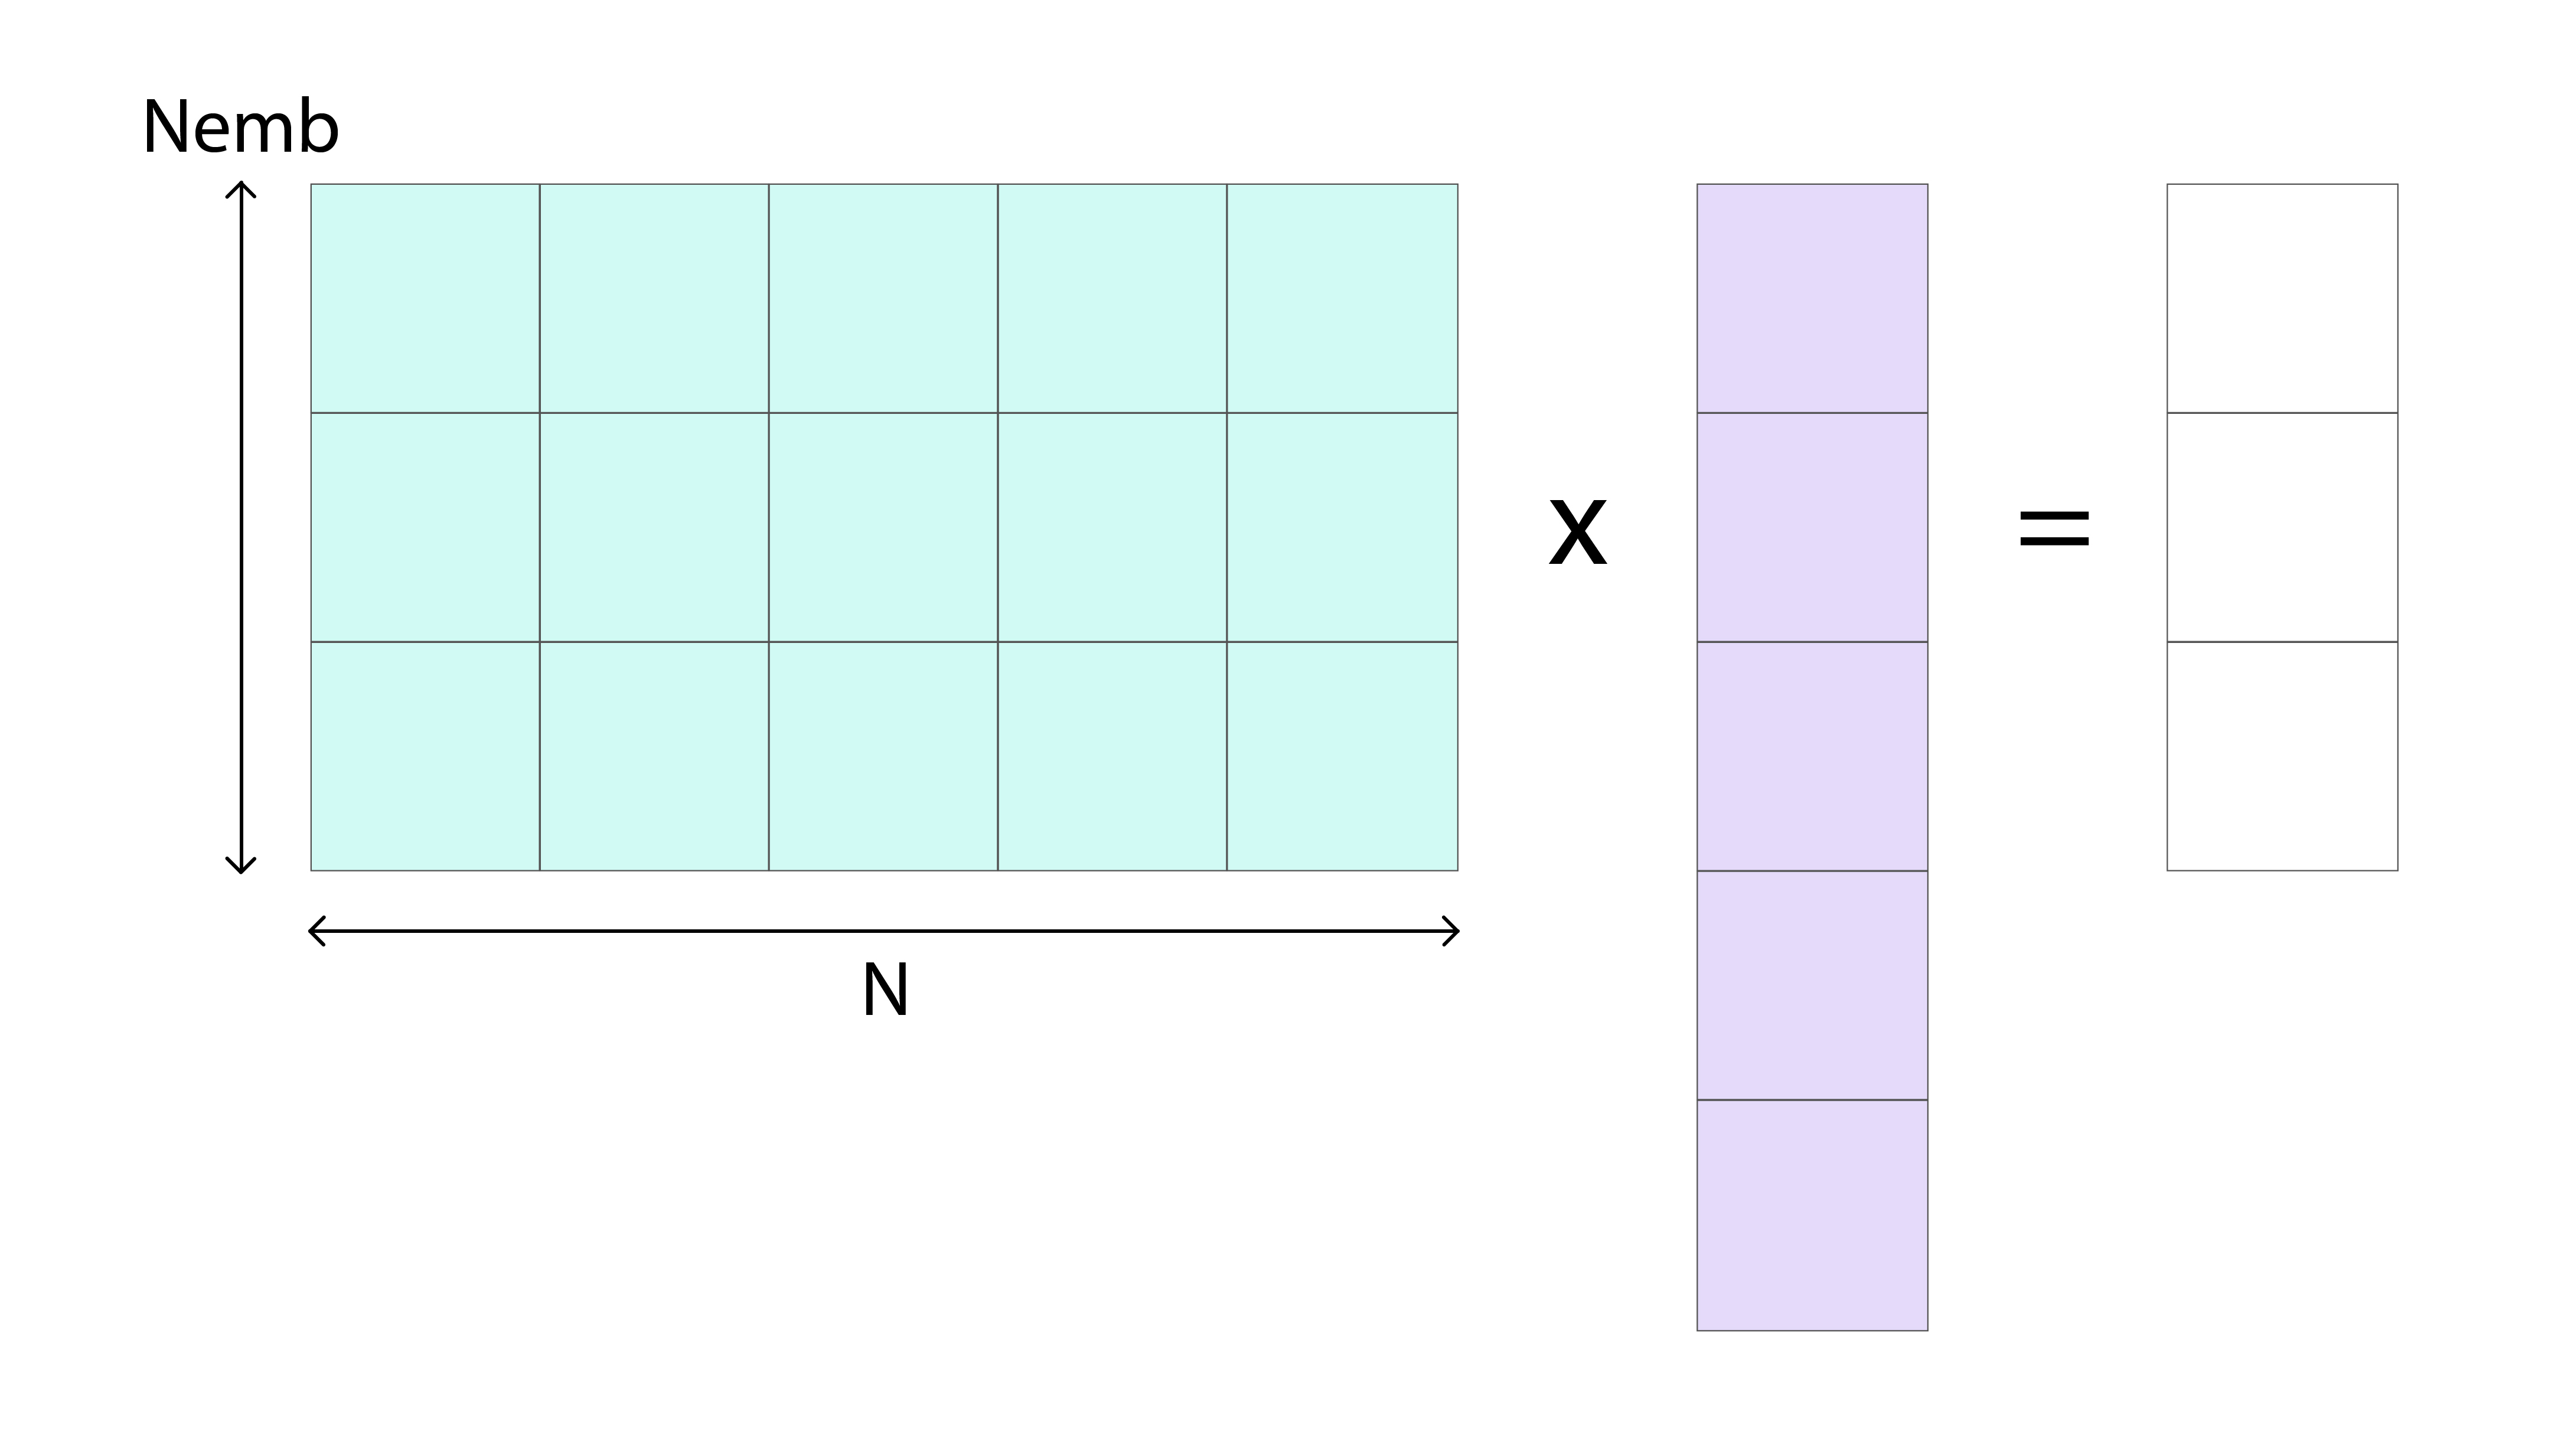

Cette opération permet de réduire, compresser, la taille d'un vecteur de taille  N  en un vecteur de taille  Nembedding .

C'est généralement cette méthode d’embedding qui est utilisée pour représenter un mot dans un sous espace vectoriel. Dans le cas des mots, la méthode consiste à multiplier une matrice d’embedding  W  par la représentation « one hot » du mot :

hi=∑(j=1 à Ndim)wij⋅xj

 
Avec  Ndim  le nombre de mot du dictionnaire,  xj  la composante  j  du vecteur « one hot » du mot.

Sous forme vectorielle :

⟺ h = W⋅X

 
## Construire la couche d'embedding avec tensorflow
Le constructeur Embedding de tensorflow.keras.layers permet d'appliquer cette transformation à une liste d'index de mot. Plus d'information ici.

tensorflow.keras.layers.Embedding(
   input_dim, output_dim, embeddings_initializer='uniform',
   embeddings_regularizer=None, activity_regularizer=None,
   embeddings_constraint=None, mask_zero=False, input_length=None, **kwargs
)

(a) Importer la couche Embedding du package tensorflow.keras.layers.
(b) Définir une couche embedding avec une entrée de dimension 100 et une sortie de dimension 5.
(c) Afficher le résultat pour un tensor constant [1,1,3]. Pour rappel, la fonction constant de tensorflow permet de définir un tensor constant.
   Les chiffres 1, 1 et 3 correspondent à des index de mots de la phrase.

In [9]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(100, 5)

result = embedding_layer(tf.constant([1,1,3]))
## Equivalent
## v = tf.random.normal([100,5])
## one_hot = tf.one_hot(tf.constant([1,2,3]), 100)
## result = tf.matmul(one_hot, v)
result.numpy()

array([[-0.0020892 ,  0.00838678,  0.01096289,  0.0192479 ,  0.00190504],
       [-0.0020892 ,  0.00838678,  0.01096289,  0.0192479 ,  0.00190504],
       [ 0.04309573, -0.04839298,  0.03244628, -0.0304232 ,  0.028869  ]],
      dtype=float32)

Maintenant que l’on a un modèle pour représenter notre mot dans une faible dimension, comment est-ce qu’on trouve la matrice d’embedding W ?

## Entraînement de la matrice d'embedding W
Dans cet exercice, nous allons choisir d'entraîner la matrice W du word embedding en même temps que l'entraînement d'un problème de classification. De ce fait, nous allons utiliser cette représentation des mots pour résoudre un problème de sentiment analysis sur les reviews IMBD. Le jeu de données contient 25000 critiques de films provenant du site IMDB labélisées en positives/négatives(plus d'informations ici).

(d) Charger le fichier 'MovieReview.csv' sous le nom df.
(e) Remplacer les valeurs 'Negative' et 'Positive' par 0 et 1.
(f) Afficher les 5 premières lignes du dataframe.

In [10]:
import pandas as pd
df = pd.read_csv('MovieReview.csv')

print(df.shape)
df.head()

(5000, 2)


text  label
0  It's been about 14 years since Sharon Stone aw...      0
1  someone needed to make a car payment... this i...      0
2  The Guidelines state that a comment must conta...      0
3  This movie is a muddled mish-mash of clichés f...      0
4  Before Stan Laurel became the smaller half of ...      0

(g) Exécuter la cellule suivante pour nettoyer les données et enlever les stopwords.

In [11]:
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')

# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()

df.text = df.text.apply(lambda x :preprocess_sentence(x))
df.head()

text  label
0  years since sharon stone awarded viewers leg c...      0
1  someone needed make car payment . . . truly aw...      0
2  guidelines state comment must contain minimum ...      0
3  movie muddled mish mash cliches recent cinema ...      0
4  stan laurel became smaller half time greatest ...      0

(h) Séparer le jeu de données df.review et df.sentiment en un ensemble d'entraînement X_text_train, y_train, et en un ensemble de test X_text_test, y_test. Nous choisirons un rapport de 80% pour les données d'entraînements et une graine aléatoire 1234.

In [12]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, y_train, y_test = train_test_split(df.text, df.label.values, test_size=0.2, random_state=1234)

Comme dans les tâches traditionnelles de text mining, les algorithmes ne traitent que des nombres et non des données textuelles. Ici, les approches par caractères ne sont pas adaptées puisque le sens d'un mot n'est pas vraiment donné par sa construction (les mots "hat" et "hate" n'ont rien à avoir alors qu'il y'a qu'un caractère de différence).

Pour ces raisons, nous allons nous placer dans l'échelle des mots.

## Tokenizer keras
La classe Tokenizer de tensorflow.keras.preprocessing.text permet de vectoriser un corpus de texte, en transformant chaque texte en une séquence d'entiers (chaque entier étant l'index d'un token dans un dictionnaire).

L'argument num_words limite la taille du dictionnaire à cette quantité. Plus d'informations ici.

tf.keras.preprocessing.text.Tokenizer(
   num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
   split=' ', char_level=False, oov_token=None, document_count=0, **kwargs
)
La méthode fit_on_texts de cet object permet à notre tokenizer de mettre à jour le dictionnaire des mots sur une liste de textes. ```python fit_on_texts( texts )

(i) Définir un objet tokenizer à l'aide du constructeur Tokenizer de tensorflow.keras.preprocessing.text en précisant une limite de mots du dictionnaire de 10000.
(j) Mettre à jour le dictionnaire de notre tokenizer à partir de X_text_train en utilisant de la méthode fit_on_texts.

In [13]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_text_train)

k) Stocker le dictionnaire de correspondance entre mots et index dans la variable word2idx à l'aide de l'attribut word_index du tokenizer.
(l) Stocker le dictionnaire de correspondance entre index et mot dans la variable idx2word à l'aide de l'attribut index_word du tokenizer.
(m) Stocker la taille du dictionnaire dans la variable vocab_size à l'aide de l'attribut num_words du tokenizer.

In [14]:
# Define the dictionary
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

La méthode texts_to_sequences du tokenizer permet de transformer chaque review en une séquence d'entiers (index des mots). Seuls les mots connus du tokenizer seront pris en compte.

tokenizer.texts_to_sequences(['hello my dear readers'])
>>> [[4422, 2974, 6117]]
Ici, l'index du mot "hello", "dear" et "readers" sont 4422, 2974 et 6117. Comme le mot "my" est un stopword, il n'est pas dans le dictionnaire et sera donc ignoré.

(o) Transformer chaque review X_text_train en une séquence d'entiers à l'aide de la méthode texts_to_sequences. Stocker le résultat dans la variable X_train.
(p) Faire de même pour X_text_test et stocker le résultat dans X_test.

In [15]:
X_train = tokenizer.texts_to_sequences(X_text_train)

X_test = tokenizer.texts_to_sequences(X_text_test)

La fonction pad_sequences de tensorflow.keras.preprocessing.sequence transforme une liste de séquences en un tableau Numpy de formes (num_samples, num_timesteps). num_timesteps est soit l'argument maxlen s'il est fourni, soit la longueur de la séquence la plus longue dans le cas contraire.

Exemple:

sequence = [[4,8,1,2], [15], [8, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=3, padding='post', truncating='post')
>>> array([[4, 8, 1],
           [15, 0, 0],
           [8, 5, 6]])
Les séquences plus courtes que maxlen sont complétées par une valeur par défaut de 0. Alors que les séquences plus longues que maxlen sont tronquées de sorte qu'elles correspondent à la longueur souhaitée. Plus d'informations ici.

pad_sequences(sequences,         # Liste des textes transformés en index
               maxlen=None,      # Nombre maximal de mots dans un texte.
               dtype='int32',    # retourne une sortie de type dtype.
               padding='pre',    # Compléter les séquences au début ('pre') ou à la fin ('post').
               truncating='pre', # coupe au début 'pre' ou à la fin 'post' si la séquence est trop longue.
               value=0.0         # Compléter les séquences avec value.
)
(q) Transfomer la liste de sequence X_train en tableau numpy à l'aide de la fonction pad_sequences. Préciser en argument de la fonction maxlen=500, padding='post' et truncating='post'. Stocker le résultat dans la variable X_train.
(r) Faire de même pour X_test.

In [16]:
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

## 4. Modèle : Bag of word avec embedding
Notre modèle sera un simple bag of word avec une méthode d’embedding :

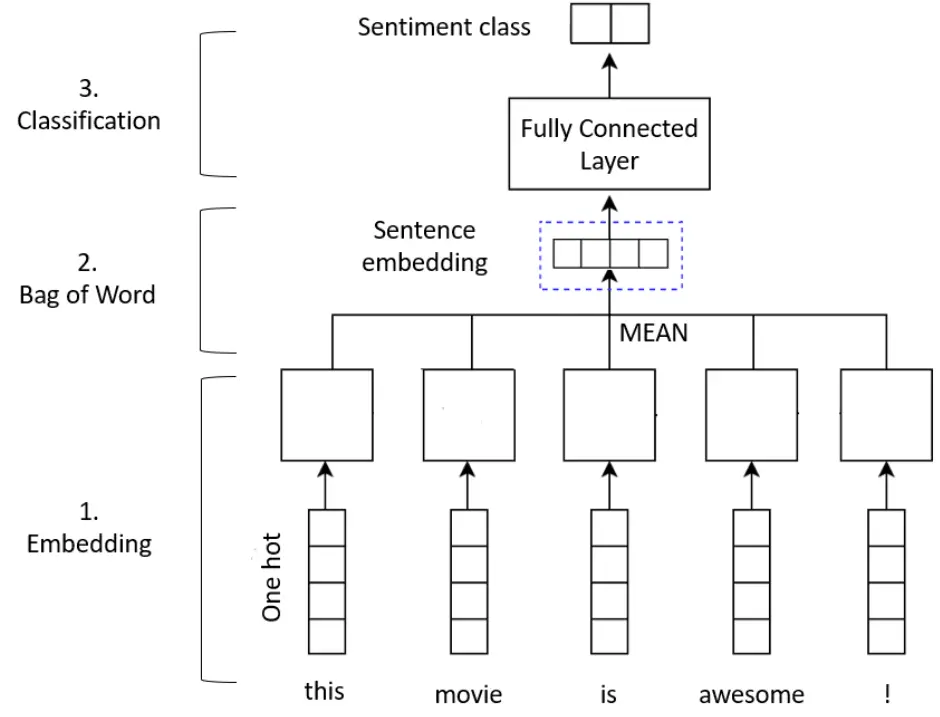

La couche Embedding va transformer chaque index de mots en vecteur d'embedding. La matrice W de l'embedding sera apprise au fur et à mesure que le modèle s'entraîne. Les dimensions résultantes sont : (lot, séquence, embedding).
Ensuite, la couche GlobalAveragePooling1D renvoie un vecteur de sortie de longueur fixe pour chaque exemple en faisant la moyenne sur la dimension de séquence. Cette transformation consiste à faire un bag of word et permet au modèle de gérer des entrées de longueur variable.
Enfin, comme nous sommes face à un problème de classification (review positive ou négative), il est nécessaire d’ajouter des couches Dense pour classifier le sentiment de la review.
(a) Définir un modèle Sequential sous le nom model.
(b) Ajouter la couche Embedding en précisant une entrée de taille 10000 et une sortie de taille 200.
(c) Ajouter la couche GlobalAveragePooling1D afin d'appliquer notre bag of word.
(d) Ajouter une couche Dense avec 256 neurones et une fonction activation relu.
(e) Ajouter une couche Dropout afin d'éviter de trop de surapprentissage.
(f) Ajouter une dernière couche Dense avec une fonction d'activation softmax.
(g) Afficher le résumé du modèle.

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout

embedding_dim = 200
model = Sequential()
model.add(Embedding(10000, embedding_dim))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 200)         2000000   
                                                                 
 global_average_pooling1d (G  (None, 200)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2,051,970
Trainable params: 2,051,970
Non-trainable params: 0
______________________________________________

(h) Compiler le modèle avec un optimizer 'adam', une fonction de perte 'sparse_categorical_crossentropy' et une métrique 'accuracy'.
(i) Entraîner le modèle avec des batchs de taille 32 et sur 5 epochs.

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
    batch_size = 32,
    epochs = 5,
    validation_data = [X_test, y_test])

Epoch 1/5
125/125 [==============================] - 37s 252ms/step - loss: 0.6917 - accuracy: 0.5170 - val_loss: 0.6836 - val_accuracy: 0.4980
Epoch 2/5
125/125 [==============================] - 35s 280ms/step - loss: 0.5485 - accuracy: 0.7632 - val_loss: 0.3977 - val_accuracy: 0.8460
Epoch 3/5
125/125 [==============================] - 36s 291ms/step - loss: 0.2511 - accuracy: 0.9107 - val_loss: 0.3428 - val_accuracy: 0.8620
Epoch 4/5
125/125 [==============================] - 28s 220ms/step - loss: 0.1326 - accuracy: 0.9553 - val_loss: 0.3862 - val_accuracy: 0.8500
Epoch 5/5
125/125 [==============================] - 32s 253ms/step - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.4339 - val_accuracy: 0.8480


(j) Évaluer le modèle sur l'échantillon de validation.

In [19]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 3s 48ms/step - loss: 0.4339 - accuracy: 0.8480


[0.43389415740966797, 0.8479999899864197]

Sous-Espace vectoriel de l'embedding
## 5. Extraire la matrice d'embedding W
Quand nous multiplions le vecteur one hot du mot avec  WW  , nous avons essentiellement accès à une ligne de  WW . L'index de la ligne est le même que l'index du mot.

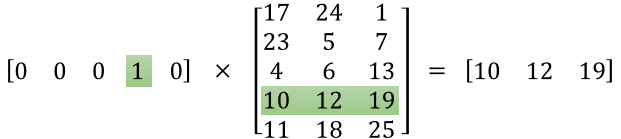

(a) Exécuter la cellule suivante pour extraire la matrice W sous le nom vectors.

In [20]:
import numpy as np
vectors = model.layers[0].trainable_weights[0].numpy()

(b) Trouver l'index du mot "amazing" à partir du dictionnaire word2idx.
(c) Afficher sa réprésentation vectorielle à l'aide de vectors.

In [21]:
idx = word2idx['amazing']
vectors[idx]

array([ 0.24131788,  0.1923025 , -0.24065912, -0.22761163,  0.23943582,
       -0.20456648,  0.13266766,  0.10328113, -0.21341302,  0.21424137,
        0.20190318,  0.22313431, -0.12442824, -0.2930297 , -0.24866198,
       -0.23202386, -0.27052605, -0.17623788, -0.15911624,  0.11611517,
       -0.21821687, -0.23759669,  0.22891499, -0.26647955, -0.22999217,
       -0.16324519, -0.23490743, -0.20460443, -0.27839497, -0.21796466,
       -0.28614068,  0.14946552, -0.20777228,  0.19225249,  0.16728348,
       -0.18182583,  0.22255501,  0.21396877, -0.24609022,  0.2756387 ,
        0.2619207 ,  0.26924008,  0.25736088,  0.28405905,  0.19766052,
       -0.2030791 ,  0.03602288,  0.24488975, -0.19309989,  0.21595041,
       -0.2576743 ,  0.02520051, -0.1760757 , -0.22612718,  0.17544226,
       -0.20150957, -0.21400777, -0.25915182,  0.24179155, -0.21324225,
        0.23748352,  0.24335302,  0.18346916, -0.20319994, -0.2830458 ,
       -0.25651094, -0.23540223,  0.21132825, -0.23149072, -0.19

(d) Calculer la distance euclidienne entre "amazing" et "wonderful".

In [22]:
vec1 = vectors[word2idx['amazing']]
vec2 = vectors[word2idx['wonderful']]
print('Distance between "wonderful" and "amazing" :', np.linalg.norm(vec1-vec2))

Distance between "wonderful" and "amazing" : 1.1501659


(e) Comparer avec la distance euclidienne entre "amazing" et "computer".

In [23]:
vec1 = vectors[word2idx['amazing']]
vec2 = vectors[word2idx['computer']]
print('Distance between "wonderful" and "amazing" :', np.linalg.norm(vec1-vec2))

Distance between "wonderful" and "amazing" : 3.9506822


## 6. Métrique dans cet espace
**Cosine similarity** est généralement utilisée comme métrique pour mesurer la distance lorsque la norme des vecteurs n'a pas d'importance. Cela se produit par exemple lorsque vous travaillez avec des données de texte représentées par le nombre de mots. Cette métrique capture la similitude, la distance entre deux mots. Cette distance représente la façon dont les mots sont liés les uns aux autres.



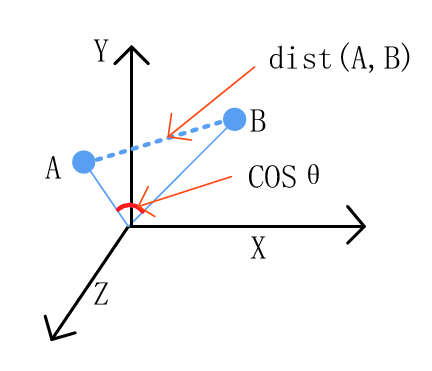


dist(A,B)=cos(θ)=A⋅B∥A∥∥B∥=∑(i=1 à N)AiBi/∑(i=1 à N)Ai2.∑(i=1 à N)Bi2
 
(a) Exécuter la cellule suivante pour définir les fonctions de similitudes.

In [25]:
def dot_product(vec1, vec2):
    return np.sum((vec1*vec2))

def cosine_similarity(vec1, vec2):
    return dot_product(vec1, vec2)/np.sqrt(dot_product(vec1, vec1)*dot_product(vec2, vec2))

def find_closest(word_index, vectors, number_closest):
    list1=[]
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def compare(index_word1, index_word2, index_word3, vectors, number_closest):
    list1=[]
    query_vector = vectors[index_word1] - vectors[index_word2] + vectors[index_word3]
    normalizer = Normalizer()
    query_vector =  normalizer.fit_transform([query_vector], 'l2')
    query_vector= query_vector[0]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def print_closest(word, number=10):
    index_closest_words = find_closest(word2idx[word], vectors, number)
    for index_word in index_closest_words :
        print(idx2word[index_word[1]]," -- ",index_word[0])

b) Afficher les 10 mots les proches de "like", "love", "great", "beautiful", "bad", "good", "book", "computer"... à l'aide de la fonction print_closest.
(c) Que peut-on conclure ?

In [26]:
print_closest('like')

got  --  0.46869972348213196
movie  --  0.3378107249736786
movies  --  0.3008185923099518
belief  --  0.29892680048942566
admits  --  0.2981826961040497
fortune  --  0.29776227474212646
christians  --  0.29540932178497314
newly  --  0.29413336515426636
cia  --  0.29381704330444336
look  --  0.2912644147872925


## Conclusion
Un modèle de classification de ce type donne en général de meilleur résultat que les approches traditionnelles. Il permet également de réduire la dimension du problème et par conséquent la tâche d'apprentissage. Néanmoins, comme nous ne donnons qu’une information sur le sentiment, le word embedding ne capture que difficilement d’autre relation que ça.

Dans le prochain exercice, nous allons entraîner la matrice d’embedding de manière non-supervisé à l'aide du célèbre algorithme word2vec. Comme l’entraînement se fait de manière non supervisée, nous allons éviter les possibles biais liés à la résolution d’un problème supervisé.

# B - Word Embedding avec Gensim

Dans la première session, une première façon d'entraîner la matrice d'embedding a été introduite. Elle consistait à l'entraîner en même temps que la résolution d'un problème de classification. Néanmoins, nous avons remarqué qu'en traitant un problème supervisé, des biais seront inévitablement ajoutés.

## Objectis
Dans ce contexte, le but de cette session est de présenter une approche non-supervisée en utilisant le célèbre algorithme Word2Vec. Développé par les équipes de Tomas Mikolov, il s'est avéré très efficace pour les tâches de NLP, conduisant à des résultats étonnants.

La structure de l'exercice sera la suivante :

- Implémentation et entraînement du modèle Word2Vec à l'aide de la librairie Gensim.
- Exploration des résultats du modèle.
- Visualiser les embeddings de mots.
Exécutez la cellule ci-dessous pour charger les packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import FreqDist
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from keras.preprocessing import text, sequence

## 1. Implémentation et entraînement du modèle Word2Vec
Qu'est-ce que Word2Vec ?
Word2Vec fournit un moyen efficace de représenter les mots sous forme de vecteurs avec une taille beaucoup plus petite que la taille du vocabulaire, tout en conservant une partie de la signification originale des mots et leur relation avec d'autres mots. Habituellement, la taille des vecteurs est de 300.

Comme dans le premier exercice, la méthode consiste à entraîner la matrice d'embedding W en même temps que la résolution d'un problème de machine learning.

Comment fonctionne le Word2Vec ?
L'approche de Word2vec repose sur l'un des deux algorithmes suivants: Common Bag Of Words (CBOW) ou Skip-gram.

Prenons un exemple concret pour expliquer la principale différence entre les deux algorithmes.

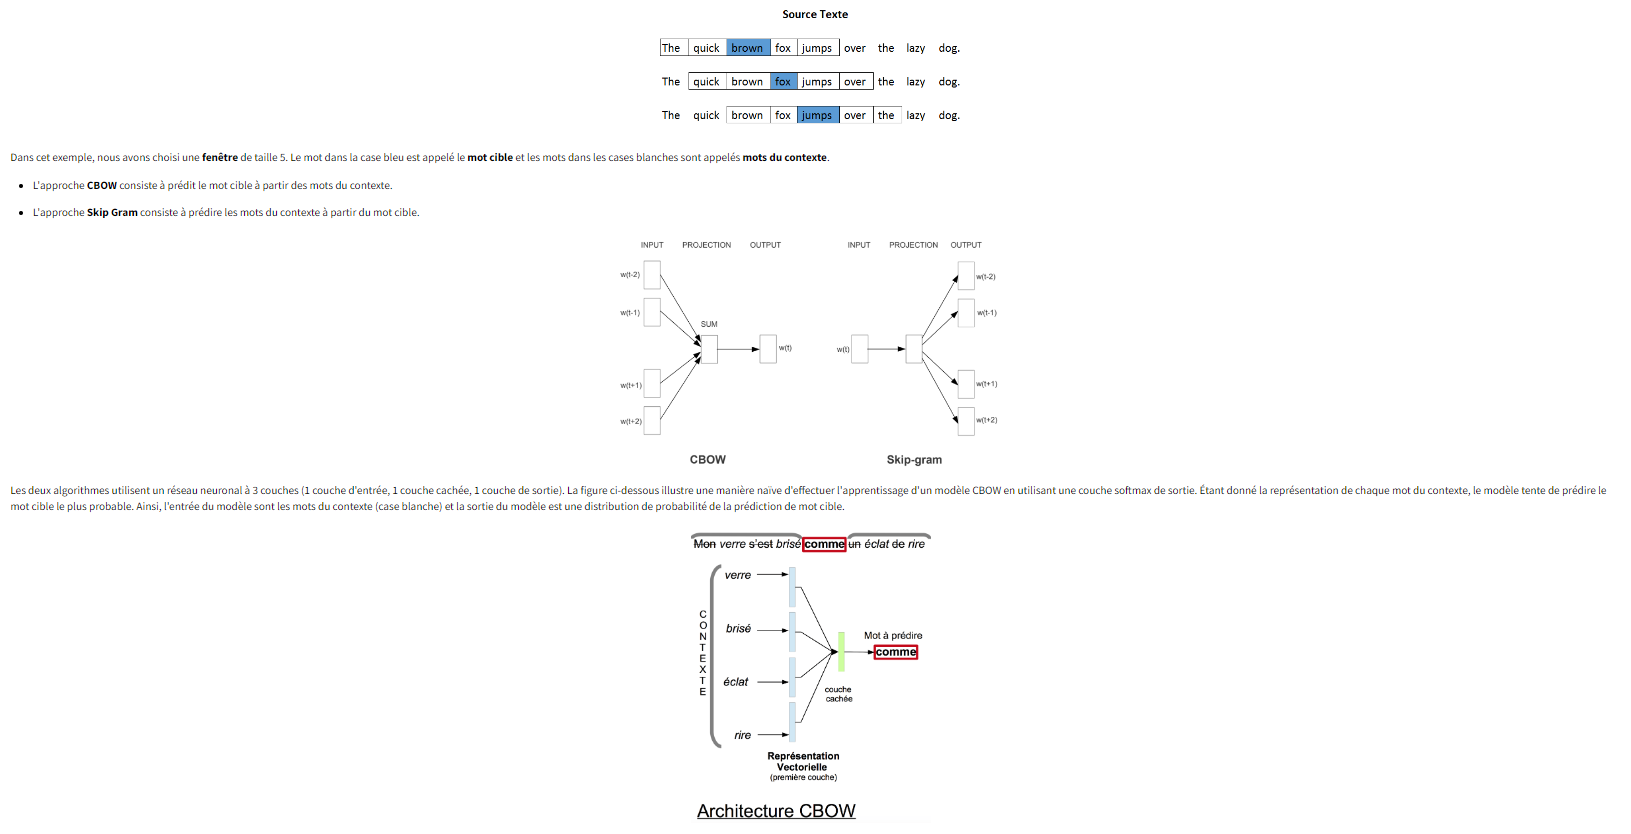

### Jeu de données
Nous travaillerons sur un ensemble de tweets en référence à des vraies catastrophes. La colonne target permet de distinguer les tweets en rapport avec une catastrophes et lesquels ne le sont pas.

Chargez le fichier "clean_tweets.csv" dans un dataframe df et affichez les 5 premières lignes.

In [9]:
df = pd.read_excel('clean_tweets.xlsx')
print('Shape: ', df.shape)
df.head()

Shape:  (208, 2)


text  target
0  320 ir icemoon aftershock djicemoon dubstep tr       0
1  70 years since annihilated 100000 people insta       1
2          aashiqui actress anu aggarwal accident       1
3                                     ablaze lord       0
4          ablaze time talk go know make due work       0

Comment construire un modèle Word2Vec en utilisant Gensim?
Afin de construire notre modèle Word2Vec, nous utiliserons le package gensim de Python, qui est une bibliothèque très populaire pour le traitement du langage naturel. La documentation est disponible ici.

Le processus de construction et de formation d'un modèle se déroule en 3 étapes:

## 1. Définition du modèle à l'aide du constructeur Word2Vec:

model = Word2Vec(window=2, min_count=20, vector_size=100, sg=0, sample=0.001, negative=5)
Cette étape nécessite de définir un certain nombre de paramètres, dont:

window: la distance maximale entre le mot actuel et le mot prédit dans une phrase. La valeur par défaut est 5.
min_count : la fréquence minimale des mots à prendre en compte. La valeur par défaut est 5.
vector_size: la dimension de l'embedding. La valeur par défaut est 100. -sg: 1 pour l'algorithme skip-gram; autrement CBOW.
sample: le seuil pour configurer quels mots de fréquence plus élevée sont sous-échantillonnés de manière aléatoire. La valeur par défaut est 0.001
negative: la variable qui contrôle l'échantillonnage négatif. Si> 0, il spécifie combien de "mots de bruit" doivent être noyés. S'il est défini sur 0, aucun échantillonnage négatif n'est utilisé. La valeur par défaut est 5.

## 2. Construire le vocabulaire à partir d'une séquence de phrases en utilisant la méthode build_vocab:

model.build_vocab(sentences, progress_per=10000)
Où sentences est la liste des listes des tokens. La variable progress_per permet de spécifier le nombre de mots à traiter avant d'afficher la progression.

## 3. Entraîner le modèle en utilisant la méthode train:

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30)
Cette étape nécessite de définir un certain nombre de paramètres, dont:

- sentences: la liste des listes de tokens.
- min_count: la fréquence minimale des mots à prendre en compte. La valeur par défaut est 5.
- total_examples: le nombre de phrases.
- epochs: le nombre d'itérations (epochs) sur le corpus.   

Créez un modèle Word2Vec w2v_model avec les paramètres suivants: min_count=20, window=2, vector_size=300, sample=6e-5, negative=20.

In [10]:
from gensim.models import Word2Vec

# defining the model by initializing a Word2Vec object
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=100,
                     alpha=0.03, 
                     negative=10,
                     seed=1)

Créez une liste de phrases sentences contenant la liste des mots de chaque tweet .
Construisez le vocabulaire avec sentences en utilisant la méthode build_vocab.
Afficher la taille du vocabulaire en utilisant l'attribut wv.index_to_key de w2v_model.
Afficher un échantillon des mots du vocabulaire.

In [11]:
# building the voc from a sequence of sentences
sentences = [str(line).split() for line in df['text']]
w2v_model.build_vocab(sentences, progress_per=10000)
words = list(w2v_model.wv.index_to_key)

print('Vocabulary size: %d' % len(words))
print(words)

Vocabulary size: 4
['accident', 'airplane', 'annihilated', 'ablaze']


Entraînez le modèle w2v_model sur 30 epochs.

In [12]:
# training the model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count,
                epochs=30)

(186, 37260)

Vous pouvez accéder directement au vecteur d'un mot à l'aide de la ligne de code suivante :

x = model.wv['word']
Choisissez un mot du vocabulaire, afficher sa forme ainsi que ses premiers éléments.

In [17]:
# finding the vector for one word
x = w2v_model.wv['accident']  # pb 'icemoon inconnu -> error alors que présent dans le dataset !'
print('Shape of one vector: ', x.shape, '\n')
print(x [:15])

Shape of one vector:  (100,) 

[-0.00053623  0.00023643  0.00510335  0.00900927 -0.00930295 -0.00711681
  0.00645887  0.00897299 -0.00501543 -0.00376337  0.0073805  -0.00153347
 -0.00453661  0.00655405 -0.00486016]


## sauvegarde le modele

In [ ]:
# Vous pouvez enregistrer et charger un modèle à l'aide des lignes de code suivantes:

# saving a model
model.save('w2v_model.bin')
# loading a model
new_model = Word2Vec.load('w2v_model.bin')

## 2 - Explorer les résultats du modèle

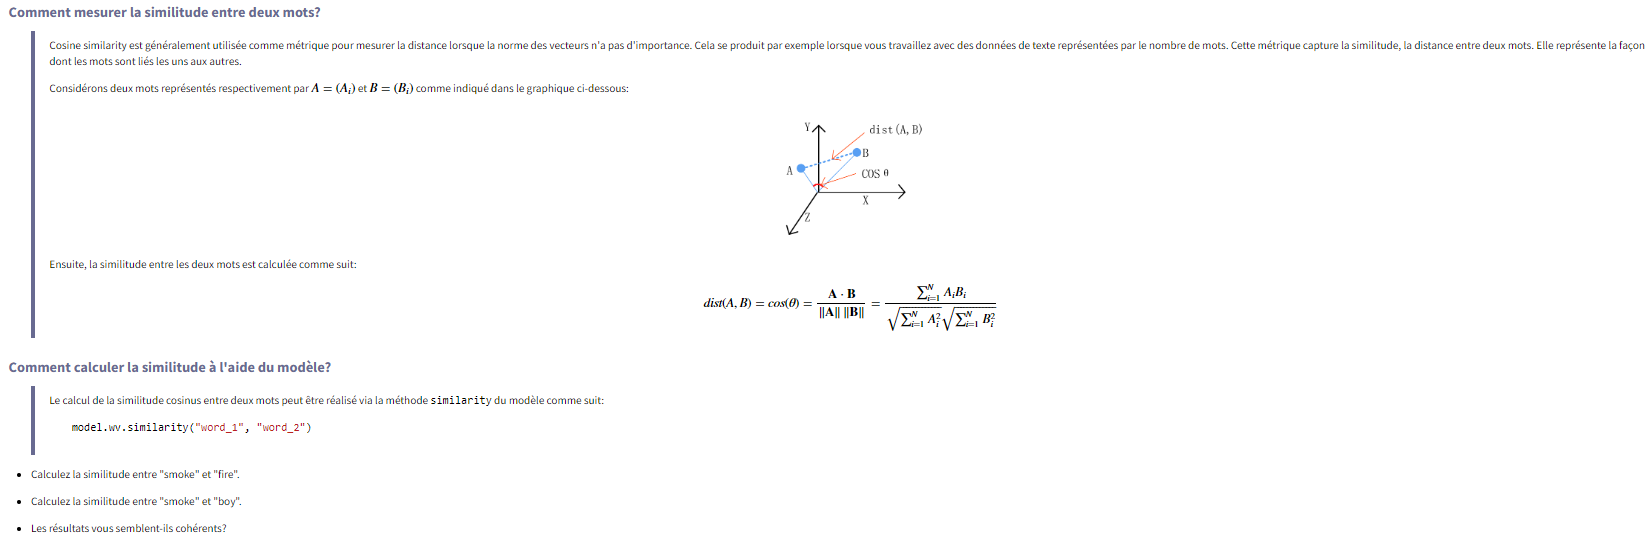

In [22]:
print('Similarity between \'accident\' and \'airplane\': ', w2v_model.wv.similarity("accident", "airplane"))
print('Similarity between \'accident\' and \'annihilated\': ', w2v_model.wv.similarity("accident", "annihilated"))

Similarity between 'accident' and 'aftershock':  -0.010839185
Similarity between 'accident' and 'boy':  -0.052346766


Il est également possible de trouver les N premiers mots les plus similaires en utilisant la méthode most_similar comme suit:

model.wv.most_similar(positive=["word_1, word_2"], negative=["word_3, word_4"], topn=10)
Où positive and negative sont les listes des mots positifs et négatifs. La variable topn indique les N premiers mots similaires à renvoyer.

Afficher les mots les plus similaires de mots "evacuation" et "happy".
Les résultats vous semblent-ils cohérents?

In [23]:
print('Most similar words of \'accident\': ')
print(w2v_model.wv.most_similar(positive=["accident"]))
print()
print('Most similar words of \'airplane\': ')
print(w2v_model.wv.most_similar(positive=["airplane"]))

Most similar words of 'accident': 
[('airplane', -0.010839177295565605), ('annihilated', -0.05234675854444504), ('ablaze', -0.111670583486557)]

Most similar words of 'airplane': 
[('ablaze', 0.0679759532213211), ('accident', -0.010839185677468777), ('annihilated', -0.02367166243493557)]


### Comment interpréter les propriétés arithmétiques?

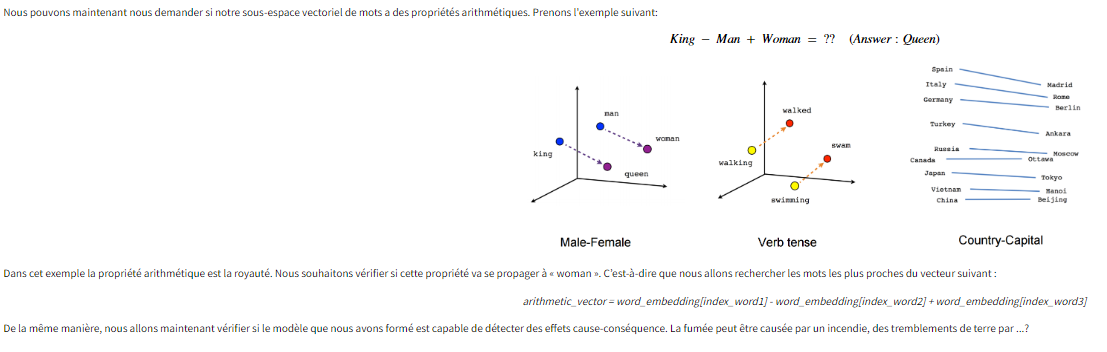

Vérifier si l'effet de causalité est vrai à l'aide de la méthode similarity avec comme argument positive=["fire", "earthquake"], negative=["smoke"]

In [25]:
w2v_model.wv.most_similar(positive=["annihilated", "accident"], negative=["airplane"], topn=10)

[('ablaze', -0.1121908575296402)]

Le modèle Word2vec est également capable de prédire la liste en fonction d'un certain context. Cela peut être fait en utilisant la méthode predict_output_word :

model.predict_output_word(['word_1', 'word_2', 'word_3']
Trouvez la prédiction du modèle pour les mots "with", "accident", "airplane".

In [26]:
w2v_model.predict_output_word([ "with", "accident", "airplane"])

[('accident', 0.25),
 ('airplane', 0.25),
 ('annihilated', 0.25),
 ('ablaze', 0.25)]

## 3. Visualisation du Word Embeddings
L'une des approches les plus courantes pour visualiser un word embedding repose sur l'analyse en composantes principales (ACP). En effet, les premières composantes de l'ACP stockent la plus grande variabilité de l'ensemble d'origine. Cela permet donc de créer un plus petit nombre de variables représentatives qui expliquent collectivement la plus grande partie de la variabilité de l'ensemble d'origine.

Par conséquent, en n'utilisant que 2 composantes principales, il est possible de visualiser le word embedding dans un graphe, appelé biplot.

Exécuter la cellule suivante pour appliquer une PCA sur la représentation vectorielle de nos mots.

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# creating an array of vectors of each word in the vocubulary
Z = w2v_model.wv[w2v_model.wv.key_to_index]

# scaling each feature
scaler = MinMaxScaler()
Z_scaled = scaler.fit_transform(Z)

# performing a PCA
pca = PCA(n_components=2)
result = pca.fit_transform(Z_scaled)

# print the shape of the result
print('Shape of the array result :', result.shape)

Shape of the array result : (4, 2)


La cellule ci-dessous définit la fonction visualize qui trace pour un mot donné ses n premiers mots liés positivement ou négativement.

Exécutez la cellule ci-dessous.

In [28]:
# Generate a scatter plot of the top-n words positively or negatively related 
# to a specific word
def PCA_results(word, relation = 'positive', n = 10):
    # get the most similar words
    if relation =='positive':
        related_words = w2v_model.wv.most_similar(positive=[word], topn=n)
    else: 
        related_words = w2v_model.wv.most_similar(negative=[word], topn=n)
    # keep only the words in the list
    related_words = [w for (w, i) in related_words]
    # find their index in word
    index_related_words = [words.index(w) for w in related_words]
    # filter PCA results for the related words
    PCA_related_words = result[index_related_words]
    
    # generate a scatter plot
    color = 'blue' if relation =='positive' else 'green' # color
    plt.scatter(PCA_related_words[:,0], PCA_related_words[:,1], color = color, label=relation)
    
    # add the words annotations in the graphs
    for i in range (n):
        plt.annotate(related_words[i], xy=(PCA_related_words[i, 0], PCA_related_words[i, 1]))

# Generate a scatter plot of a word 
# and its top-n positively or negatively related words
def visualize(word, n=5):
    
    plt.figure(figsize=(15,7))
    
    # plot related words in the scatterplot
    PCA_results(word, relation = 'positive', n = n)
    PCA_results(word, relation = 'negative', n = n)
    
    # add the word in red in the graph
    index_word = words.index(word)
    plt.scatter(result[index_word,0],result[index_word,1], color = 'red', label='word')
    plt.annotate(word, xy=(result[index_word, 0], result[index_word, 1]))
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()

    plt.show();

Choisissez un mot du vocabulaire et visualisez le résultat à l'aide de la fonction visualize.

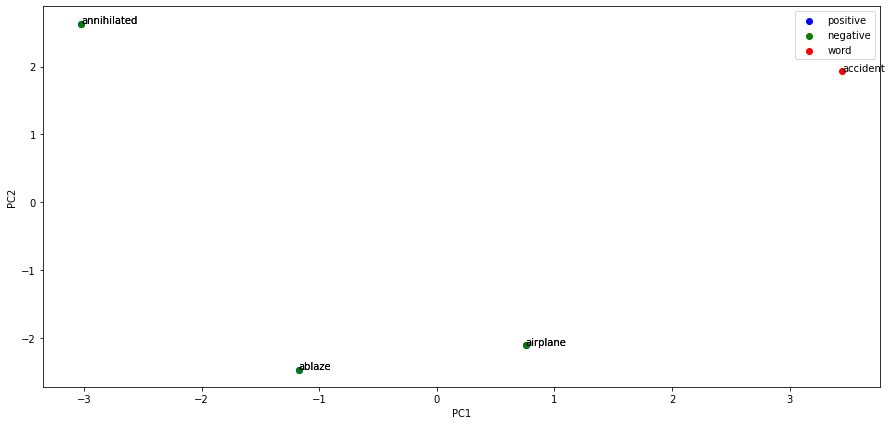

In [31]:
visualize('accident', n=3)  # n=10 => error ici

Lors d'utilisation de word embedding pour transformer des données textuelles en données numériques, il est souvent préférable d'utiliser des modèles pré-entraîné que des modèles à entraîner "from scratch". Les modèles pré-entraînés sont généralement entraîné sur des jeux de données beaucoup plus volumineux (Wikipédia) sur des durées allant jusqu'à plusieurs semaines.

Cela peut être fait via l'api de gensim.

Exécutez la cellule ci-dessous pour télécharger et charger un modèle pré-entraîné.

In [32]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-200")

model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.6978679299354553),
 ('princess', 0.6081744432449341),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998258590698),
 ('elizabeth', 0.546359658241272),
 ('daughter', 0.5399125814437866),
 ('kingdom', 0.5318052172660828),
 ('mother', 0.5168542861938477),
 ('crown', 0.5164473056793213)]

Comme vous pouvez le voir, le résultat est conforme à ce à quoi on aurait pu s'attendre.

Il est également possible d'aller plus loin en visualisant le vecteur définissant le genre d'un mot à travers une ACP.

Exécutez la cellule ci-dessous pour afficher la dimension de genre.

In [ ]:
pairs = [('she', 'he'),
('her', 'his'),
('woman', 'man'),
('sister', 'brother'),
('herself', 'himself'),
('daughter', 'son'),
('mother', 'father'),
('girl', 'boy'),
('queen', 'king')]

n = np.shape(pairs)[0]

difference_matrix = np.array([model.word_vec(a[0])-model.word_vec(a[1]) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

model_words=[model.word_vec(word) for word in np.concatenate(pairs)]

coord = pca.fit_transform(model_words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(12,12))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show()

Exécutez la cellule suivante pour afficher la relation entre les capitales et les pays.

In [ ]:
pairs = [('paris', 'france'),
('rome', 'italy'),
('berlin', 'germany'),
('ankara', 'turkey'),
('moscow', 'russia'),
('ottawa', 'canada'),
('tokyo', 'japan'),
('hanoi', 'vietnam'),
('beijing', 'china'),
('canberra', 'australia'),
('brussels', 'belgium'),
('brasilia', 'brazil'),
('copenhagen', 'denmark'),
('london', 'england'),
('athens', 'greece'),
('lisbon', 'portugal'),
('madrid', 'spain')]

n = np.shape(pairs)[0]

difference_matrix = np.array([model.word_vec(a[0])-model.word_vec(a[1]) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[model.word_vec(word) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(12,12))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show()

## Conclusion
Le "word2vec embedding" capture efficacement les propriétés sémantiques et arithmétiques d'un mot. Il permet également de réduire la dimension du problème et par conséquent la tâche d'apprentissage.

Nous pouvons nous imaginer utiliser l’algorithme word2vec pour pré-entraîner la matrice d’embedding du modèle de sentiment analysis. Par conséquent, notre modèle de classification aura une bien meilleure représentation des mots lors de la phase d’apprentissage des sentiments.

# C - Word2vec from scratch
La librairie Gensim permet d'entraîner des matrices d'embedding relativement rapidement, mais comme l'entraînement n'est effectué que sur CPU, la puissance accélérée des GPU ne peut pas être utilisée.

C'est pourquoi, nous allons maintenant implémenter l'algorithme Word2vec sur tensorflow.

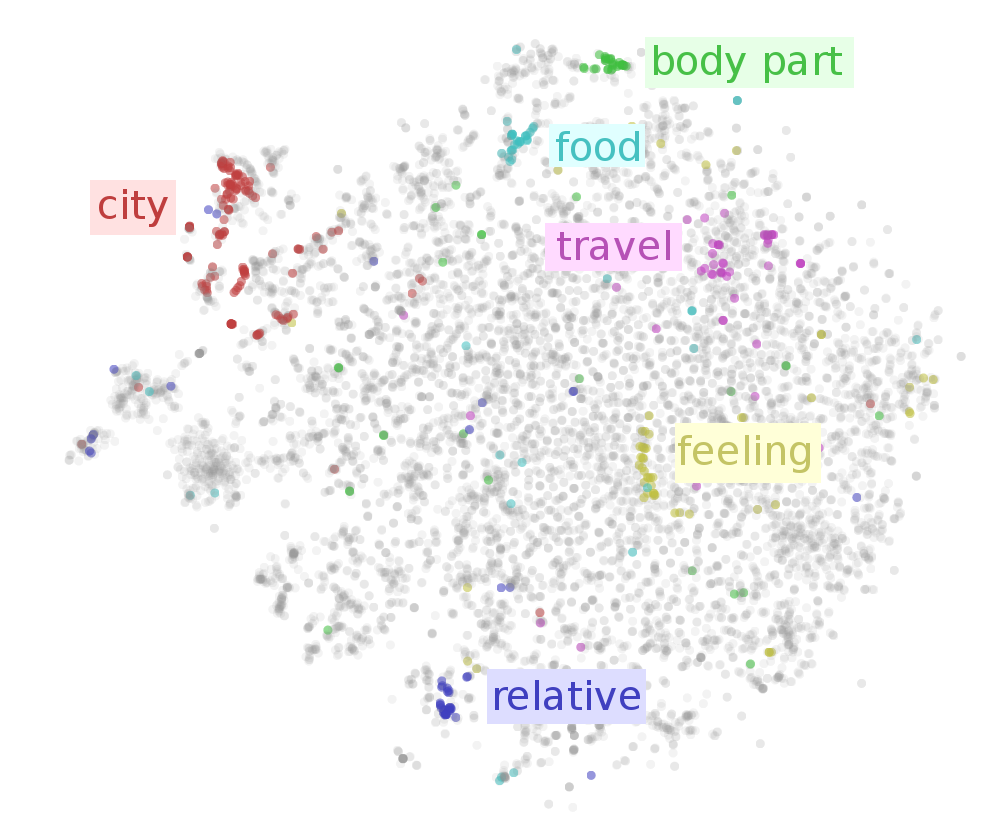

## Jeu de données
Généralement les matrices d'embedding sont entraînés sur des jeux de données très volumineux de dizaines voir centaines de Gigaoctet : Wikipédia...

Pour une raison de temps de calcul, nous allons faire le choix de se restreindre au jeu de données présenté dans le premier exercice. Pour rappel, il comporte 25000 critiques de films IMDB (plus d'informations ici).

Comme l'approche ne nécessite que du texte, la colonne sentiment ne sera pas utilisée.

Il est conseillé d'utiliser la version colab de cet exercice afin d'avoir une execution plus rapide des codes: Lien vers le colab

Charger le fichier 'MovieReview.csv' sous le nom df.
Enlever la colonne 'sentiment' de df.
Afficher les 5 premières lignes du dataframe.

In [34]:
import pandas as pd
df = pd.read_csv('MovieReview.csv')
df = df.drop('label', axis=1)
print(df.shape)
df.head()

(5000, 1)


text
0  It's been about 14 years since Sharon Stone aw...
1  someone needed to make a car payment... this i...
2  The Guidelines state that a comment must conta...
3  This movie is a muddled mish-mash of clichés f...
4  Before Stan Laurel became the smaller half of ...

In [47]:
""" je divise à 10 ici df pour compilation du modele + rapide """
df = df.iloc[:500,:]

In [ ]:
Exécuter la cellule suivante pour nettoyer les données et enlever les stopwords.

In [48]:
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')

# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()

df.text = df.text.apply(lambda x :preprocess_sentence(x))
df.head()

C:\Users\UserPC\AppData\Local\Temp\ipykernel_5032\247004699.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(lambda x :preprocess_sentence(x))


text
0  years since sharon stone awarded viewers leg c...
1  someone needed make car payment . . . truly aw...
2  guidelines state comment must contain minimum ...
3  movie muddled mish mash cliches recent cinema ...
4  stan laurel became smaller half time greatest ...

## Tokenizer
Définir un objet tokenizer à l'aide du constructeur Tokenizer de tensorflow.keras.preprocessing.text en précisant une limite de mots du dictionnaire de 10000.
Mettre à jour le dictionnaire de notre tokenizer à l'aide de la méthode fit_on_texts .

In [49]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.text)

Stocker le dictionnaire de correspondance entre mots et index dans la variable word2idx à l'aide de l'attribut word_index du tokenizer.
Stocker le dictionnaire de correspondance entre index et mot dans la variable idx2word à l'aide de l'attribut index_word du tokenizer.
Stocker la taille du dictionnaire dans la variable vocab_size à l'aide de l'attribut num_words du tokenizer.

In [50]:
# Define the dictionary
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

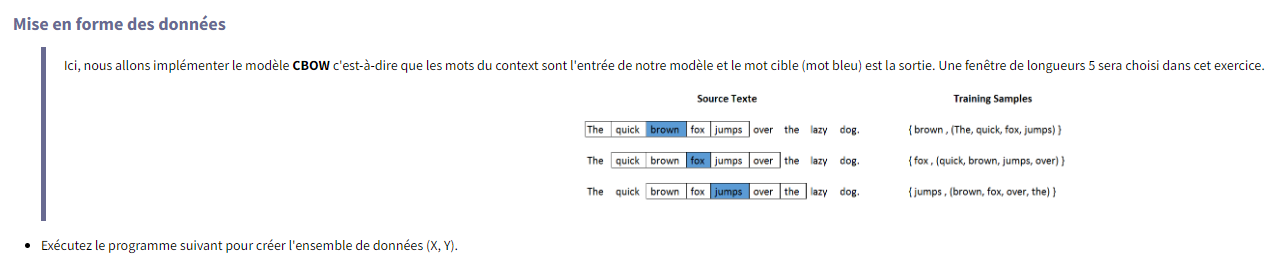

In [51]:
import numpy as np


def sentenceToData(tokens, WINDOW_SIZE):
    window = np.concatenate((np.arange(-WINDOW_SIZE,0),np.arange(1,WINDOW_SIZE+1)))
    X,Y=([],[])
    for word_index, word in enumerate(tokens) :
        if ((word_index - WINDOW_SIZE >= 0) and (word_index + WINDOW_SIZE <= len(tokens) - 1)) :
            X.append(word)
            Y.append([tokens[word_index-i] for i in window])
    return X, Y


WINDOW_SIZE = 5

X, Y = ([], [])
for text in df.text:
    for sentence in text.split("."):
        word_list = tokenizer.texts_to_sequences([sentence])[0]
        if len(word_list) >= WINDOW_SIZE:
            Y1, X1 = sentenceToData(word_list, WINDOW_SIZE//2)
            X.extend(X1)
            Y.extend(Y1)
    
X = np.array(X).astype(int)
y = np.array(Y).astype(int).reshape([-1,1])
print('Shape of X :', X.shape)
print('Shape of Y :', y.shape)

Shape of X : (33886, 4)
Shape of Y : (33886, 1)


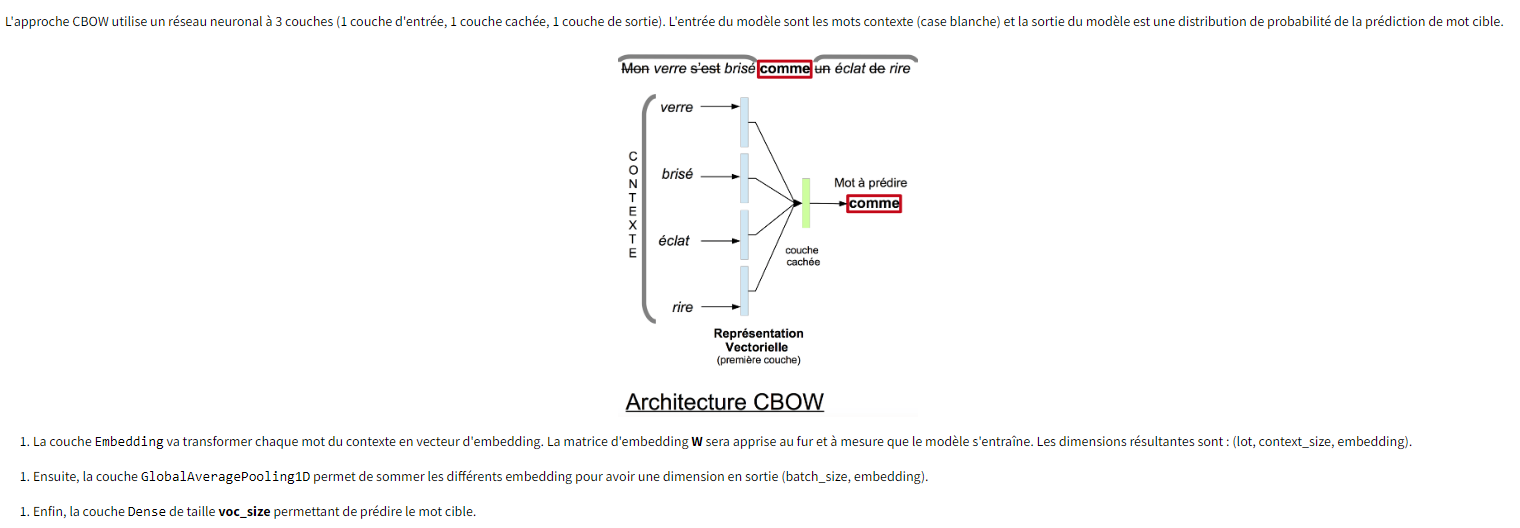

Définir un modèle model à l'aide du constructeur Sequential.
Ajouter la couche Embedding en précisant une entrée de taille 10000 et une sortie de taille 300.
Ajouter la couche GlobalAveragePooling1D afin d'appliquer le bag of word.
Ajouter une couche Dense avec 10000 neurones et une fonction activation softmax.
Afficher le résumé du modèle.

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

embedding_dim = 300
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GlobalAveragePooling1D())
model.add(Dense(vocab_size, activation='softmax'))

Comme l'entraînement de ce modèle est très long, charger les poids "word2vec.h5" du modèle à l'aide de la méthode load_weights.
   Le modèle a été entraîné sur 50 epoch ce qui correspond à environ 4h de calcul.

In [ ]:
# Fitting model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# history = model.fit(X, y,
#     batch_size = 128,
#     epochs=10)

# Load weights
model.load_weights("word2vec.h5")

""" indisponible en chargement ici """

In [53]:
# Fitting model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, y,
                    batch_size = 128,
                    epochs=10)



Epoch 1/10
265/265 [==============================] - 211s 790ms/step - loss: 8.8585 - accuracy: 0.0111
Epoch 2/10
265/265 [==============================] - 218s 823ms/step - loss: 8.0595 - accuracy: 0.0136
Epoch 3/10
265/265 [==============================] - 231s 870ms/step - loss: 7.8766 - accuracy: 0.0185
Epoch 4/10
265/265 [==============================] - 227s 856ms/step - loss: 7.6817 - accuracy: 0.0276
Epoch 5/10
265/265 [==============================] - 236s 890ms/step - loss: 7.4006 - accuracy: 0.0409
Epoch 6/10
265/265 [==============================] - 209s 787ms/step - loss: 7.0097 - accuracy: 0.0588
Epoch 7/10
265/265 [==============================] - 161s 608ms/step - loss: 6.5034 - accuracy: 0.0868
Epoch 8/10
265/265 [==============================] - 177s 666ms/step - loss: 5.8930 - accuracy: 0.1279
Epoch 9/10
265/265 [==============================] - 172s 649ms/step - loss: 5.2064 - accuracy: 0.1837
Epoch 10/10
265/265 [==============================] - 145s 548m

## Sous-Espace vectoriel de l'embedding

### Extraire la matrice d'embedding
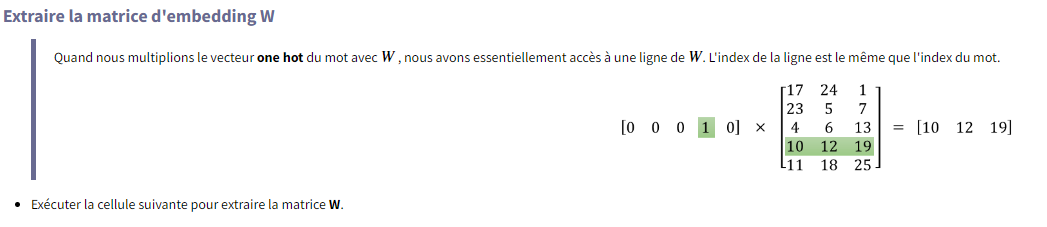

In [54]:
vectors = model.layers[0].trainable_weights[0].numpy()

Exécuter la cellule suivante pour définir les fonctions de similitudes.

In [55]:
import numpy as np
from sklearn.preprocessing import Normalizer

def dot_product(vec1, vec2):
    return np.sum((vec1*vec2))

def cosine_similarity(vec1, vec2):
    return dot_product(vec1, vec2)/np.sqrt(dot_product(vec1, vec1)*dot_product(vec2, vec2))

def find_closest(word_index, vectors, number_closest):
    list1=[]
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def compare(index_word1, index_word2, index_word3, vectors, number_closest):
    list1=[]
    query_vector = vectors[index_word1] - vectors[index_word2] + vectors[index_word3]
    normalizer = Normalizer()
    query_vector =  normalizer.fit_transform([query_vector], 'l2')
    query_vector= query_vector[0]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def print_closest(word, number=10):
    index_closest_words = find_closest(word2idx[word], vectors, number)
    for index_word in index_closest_words :
        print(idx2word[index_word[1]]," -- ",index_word[0])

Afficher les 10 mots les proches de "body", "france", "newspaper", "virus", "book", "dad" ... à l'aide de la fonction print_closest.

In [56]:
print_closest('zombie')

closeup  --  0.4601256251335144
doorway  --  0.4055538475513458
undeniable  --  0.3710987865924835
stayed  --  0.3710440993309021
windshield  --  0.3673321008682251
normally  --  0.35042256116867065
blocks  --  0.34842541813850403
elvis  --  0.3439537286758423
milestones  --  0.3430013954639435
constitute  --  0.3356046676635742


### Propriétés Arithmétiques

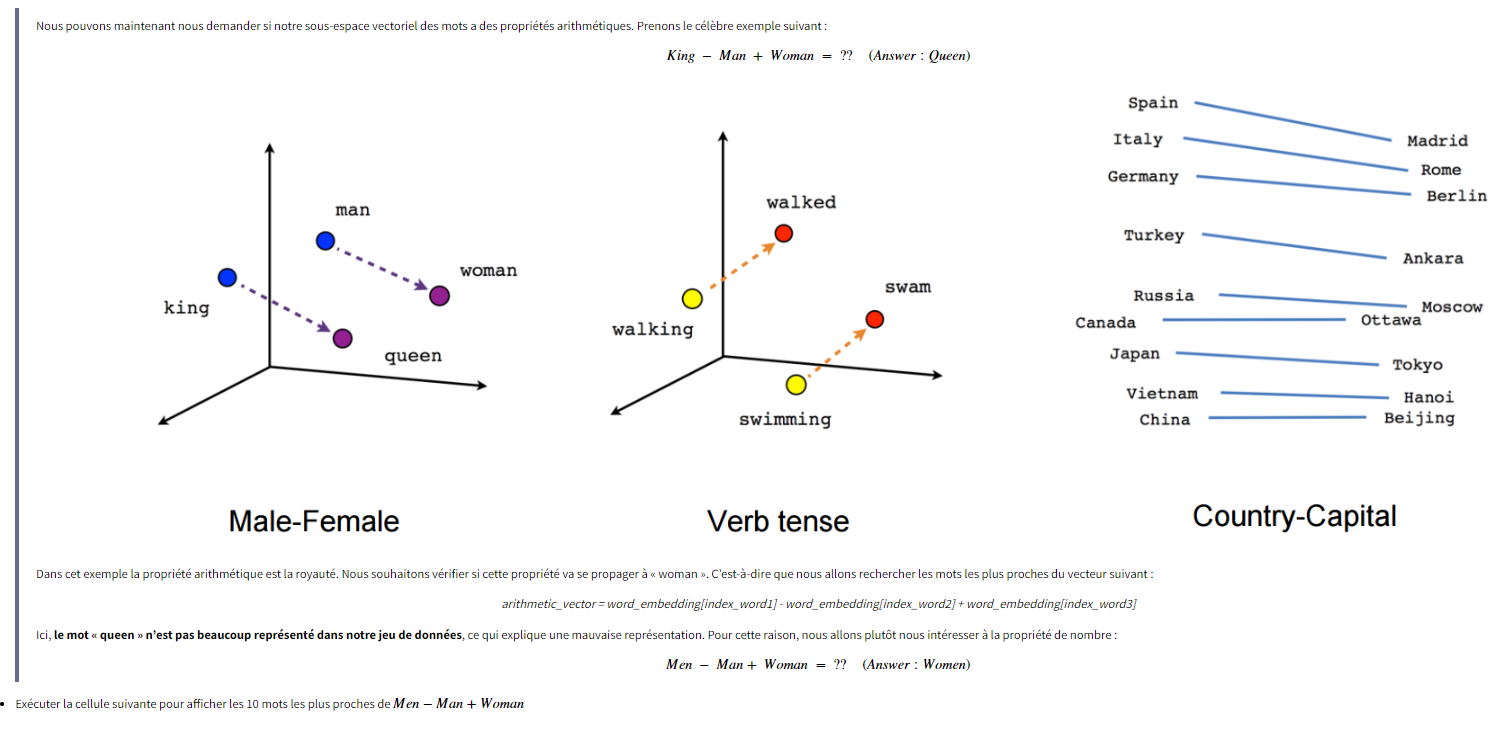

In [57]:
## Run the program
index_compare_words = compare(word2idx['men'], word2idx['man'], word2idx['woman'], vectors, 5)
for index_word in index_compare_words :
    print(idx2word[index_word[1]], " -- ", index_word[0])

woman  --  0.4990658462047577
men  --  0.4670187532901764
sharkish  --  0.31024742126464844
urinating  --  0.3030579090118408
expresses  --  0.2769908607006073


Le résultat pour  Men−Man+SoldierMen−Man+Soldier  

In [58]:
index_compare_words = compare(word2idx['men'], word2idx['man'], word2idx['soldier'], vectors, 5)
for index_word in index_compare_words :
    print(idx2word[index_word[1]], " -- ", index_word[0])

men  --  0.5059475898742676
lop  --  0.27402448654174805
overtones  --  0.2706657648086548
okay  --  0.26149991154670715
entitled  --  0.2614675760269165


Le résultat pour  Zombies−Zombie+MonsterZombies−Zombie+Monster  :

In [59]:
index_compare_words = compare(word2idx['zombies'], word2idx['zombie'], word2idx['monster'], vectors, 5)
for index_word in index_compare_words :
    print(idx2word[index_word[1]], " -- ", index_word[0])

monster  --  0.6191955208778381
zombies  --  0.436662882566452
polluted  --  0.2995285987854004
inhabits  --  0.26529476046562195
virginia  --  0.2597229778766632


En utilisant une ACP, nous pouvons trouver la dimension de certaines propriétés.

Exécuter la cellule suivante pour trouver le vecteur définissant la propriété de nombre.

[0.23076915 0.14650107 0.09481729 0.08187086 0.06542815 0.05905587
 0.0530225  0.04637149 0.04343795]


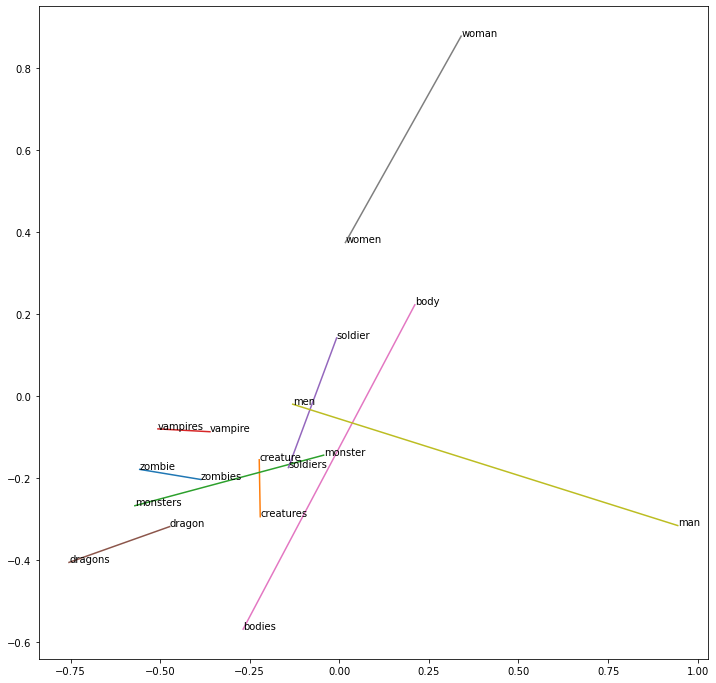

In [60]:
## Run the program.
from sklearn.decomposition import PCA

pairs = [('zombies', 'zombie'),
('creatures', 'creature'),
('monsters', 'monster'),
('vampires', 'vampire'),
('soldiers', 'soldier'),
('dragons', 'dragon'),
('bodies', 'body'),
('women', 'woman'),
('men', 'man')]

n=np.shape(pairs)[0]
difference_matrix = np.array([vectors[word2idx[a[0]]]-vectors[word2idx[a[1]]] for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[vectors[word2idx[word]] for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)
normalizer = Normalizer()
coord =  normalizer.fit_transform(coord, 'l2')
print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(figsize=(12,12))

for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))

for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])

plt.show()

Nous pouvons appliquer le même raisonnement entre les verbes à l’infinitif et les verbes finissant par -ed.

[0.38366063 0.23378195 0.10166692 0.06817688 0.05320822]


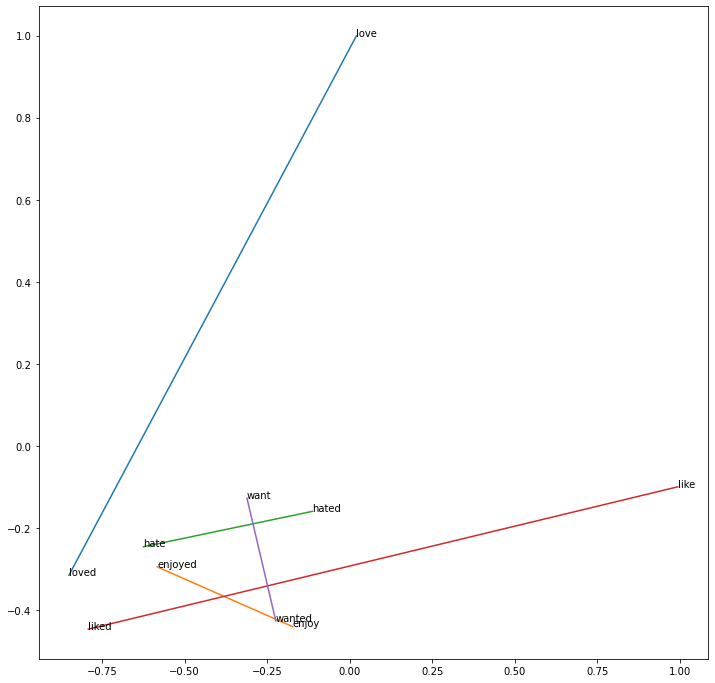

In [61]:
## Run the program.
from sklearn.decomposition import PCA

pairs = [('love', 'loved'),
('enjoy', 'enjoyed'),
('hate', 'hated'),
('like', 'liked'),
('want', 'wanted')]

n=np.shape(pairs)[0]
difference_matrix = np.array([vectors[word2idx[a[0]]]-vectors[word2idx[a[1]]] for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[vectors[word2idx[word]] for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)
normalizer = Normalizer()
coord =  normalizer.fit_transform(coord, 'l2')
print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(figsize=(12,12))

for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))

for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])

plt.show()

### Conclusion
Le "word2vec embedding" capture efficacement les propriétés sémantiques et arithmétiques d'un mot. Il permet également de réduire la dimension du problème et par conséquent la tâche d'apprentissage.

Nous pouvons toutefois remarquer que les modèles pré-entraînés de la session précédente était plus performant que notre modèle from scratch. La différence de volumétrie de données ainsi que de temps de calcul peut expliquer cet écart.

# D - Machine Translation

## Contexte et Objectif

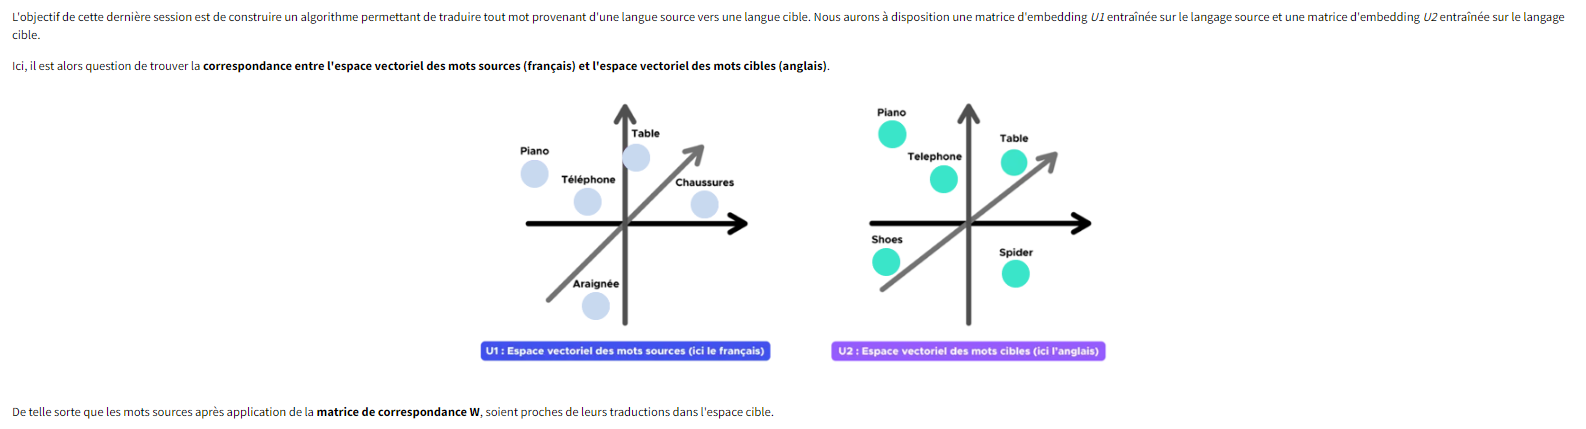

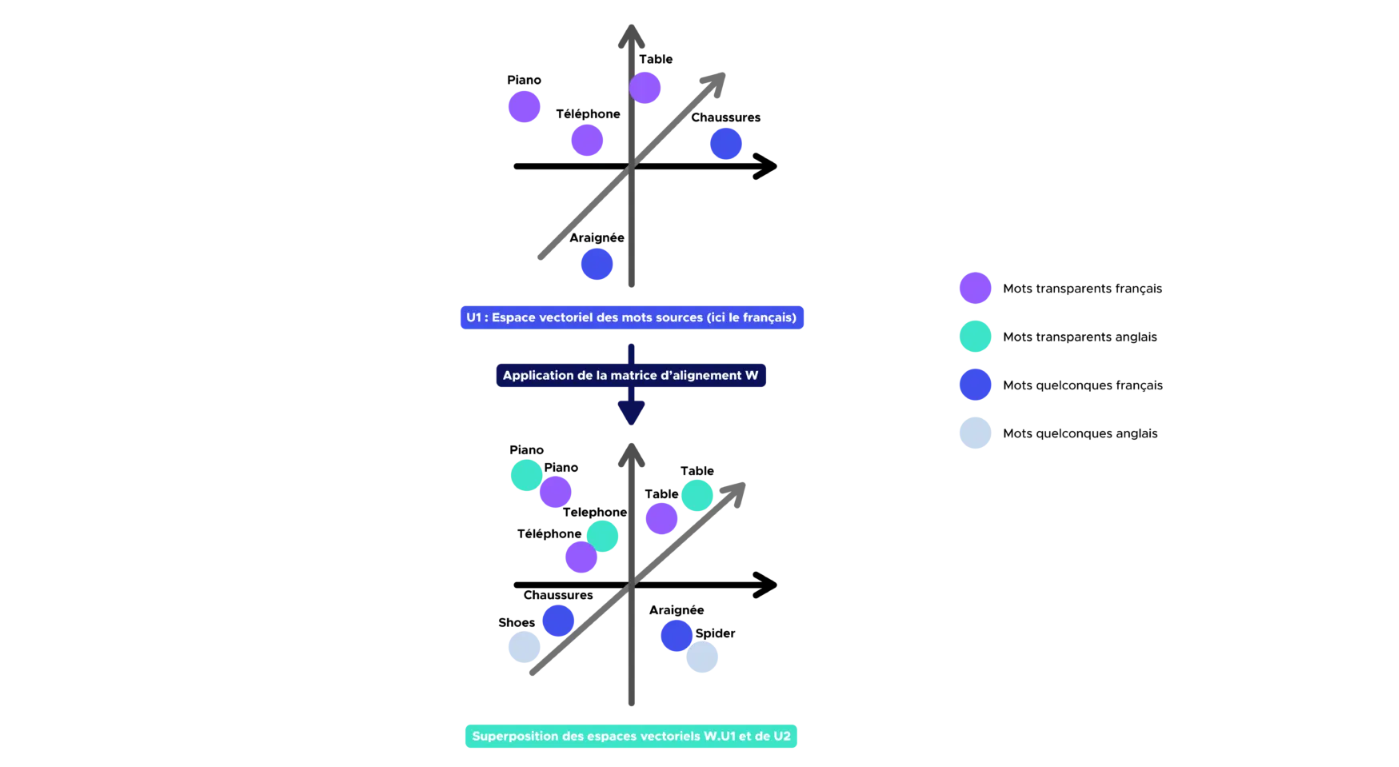

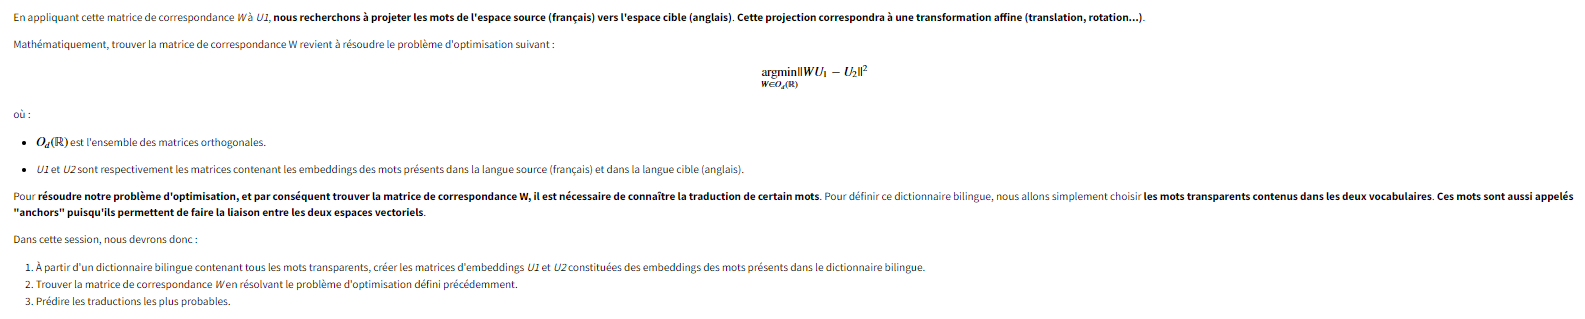

## 1. Dictionnaire bilingue 
Charger les deux matrices d'embeddings
Dans un premier temps, nous allons récupération deux matrices d’embeddings pré-entraînées respectivement pour la langue française et anglaise.

Exécuter le code suivant pour télécharger les deux matrices d'embeddings.

In [62]:
from pathlib import Path
from urllib.request import urlretrieve

PATH_TO_DATA = Path()

# le téléchargement des vecteurs de mots prends plusieurs minutes et pèse envrion 3GB.
fr_embeddings_path = PATH_TO_DATA / 'cc.fr.300.vec.gz'
if not fr_embeddings_path.exists(): 
    urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.vec.gz', fr_embeddings_path)
en_embeddings_path = PATH_TO_DATA / 'cc.en.300.vec.gz'
if not en_embeddings_path.exists():
    urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz', en_embeddings_path)

Les matrices ont été entraînées sur Common Crawl et Wikipédia par l'algorithme fastText très similaire au Word2vec.

Exécuter la cellule de code suivante définissant la classe Word2Vec.

In [63]:
import numpy as np
import gzip

class Word2Vec():
    def __init__(self, filepath, vocab_size=50000):
        self.words, self.embeddings = self.load_wordvec(filepath, vocab_size)
        # Mappings for O(1) retrieval:
        self.word2id = {word: idx for idx, word in enumerate(self.words)}
        self.id2word = {idx: word for idx, word in enumerate(self.words)}
    
    def load_wordvec(self, filepath, vocab_size):
        assert str(filepath).endswith('.gz')
        words = []
        embeddings = []
        with gzip.open(filepath, 'rt') as f:
            next(f)  # Skip header
            for i, line in enumerate(f):
                word, vec = line.split(' ', 1)
                words.append(word)                                 
                embeddings.append(np.fromstring(vec, sep=' '))     
                if i == (vocab_size - 1):
                    break
        print('Loaded %s pretrained word vectors' % (len(words)))
        return words, np.vstack(embeddings)
    
    def encode(self, word):
        '''
        Inputs:
        -word : mot
        
        Output:
        - l'embedding du mot correspondant
        '''
        if word in self.words : 
            row = self.embeddings[self.word2id[word],:]
            return(row)
        
        else : 
            return(np.zeros((1, self.embeddings.shape[1])))  #si le mot n'est pas dans le dictionnaire
    
    def score(self, word1, word2):
        '''
        Inputs:
        -word1, word2 : mot
        
        Output:
        -score des deux mots
        '''
        
        if (word1 in self.words) and (word2 in self.words):  #si les mots sont dans le dictionnaire
            #on met sous forme d'embedding les mots
            emb1 = self.encode(word1)
            emb2 = self.encode(word2)
            #on calcule le score
            score = np.dot(emb1, emb2)/ (np.linalg.norm(emb1) * np.linalg.norm(emb2))
            return(score)
        
        else:  #si le mot n'est pas dans le dictionnaire
            return(0) 
            

    def most_similar(self, word, k=5):
        '''
        Inputs:
        - word : mot
        - k : un réel 
        
        Output:
        - best_words : liste des k+1 les plus similaire à word (on renvoie en 1er word pour vérifier la fonction
        + les k autres)
        '''
        #on calcule l'ensemble des scores
        liste_score = [self.score(word, w) for w in self.words] 
        #on trie et ressort les k+1 meilleures mots.
        index = np.argsort(liste_score)[::-1][0:k+1]
        best_words = [ self.id2word[idx] for idx in index]
        
        return(best_words)

Instancier la classe Word2Vec avec les paramètres filepath=fr_embeddings_path et vocab_size=50000 dans une variable intitulée fr_word2vec.  

Créer de la même manière la variable intitulée en_word2vec.

In [66]:
fr_word2vec = Word2Vec(filepath=fr_embeddings_path, vocab_size=50000)
en_word2vec = Word2Vec(filepath=en_embeddings_path, vocab_size=50000)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 5973: character maps to <undefined>

En utilisant la méthode most_similar de la classe Word2Vec, déterminer les 5 termes les plus similaires au mot "voiture".

In [ ]:
fr_word2vec.most_similar("voiture")

Comme nous pouvons le constater, cette méthode most_similar pourrait servir à trouver par exemple une liste de synonymes aux mots fournis en entrée. Passons désormais à la traduction de mots.

### Créaction du dictionnaire bilingue
Une fois les deux matrices d'embeddings chargées, nous allons maintenant définir un dictionnaire bilingue contenant tous les mots transparents apparaissant dans les deux vocabulaires (table, television, radio, piano, telephone...). Pour cela, nous voulons définir deux matrices d'embeddings X (X  ∈U1∈U1 ) et Y (Y  ∈U2∈U2 ) correspondant :

X : matrice d'embedding en français des mots du dictionnaire bilingue
Y : matrice d'embedding en anglais des mots du dictionnaire bilingue

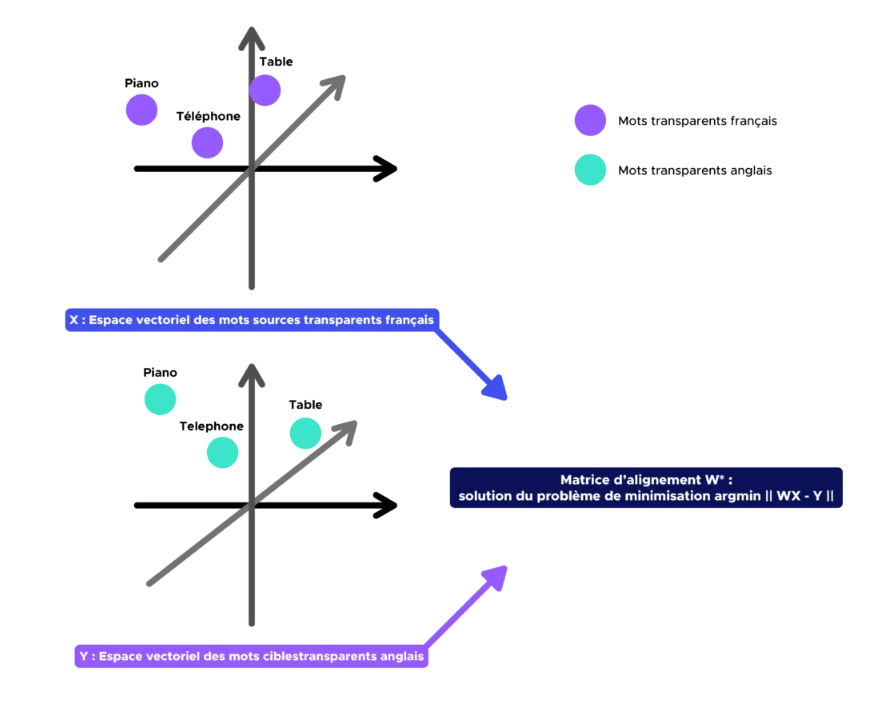

L'objectif sera ensuite de trouver l'application W qui projettera l'espace vectoriel de mots source (par exemple le français) sur l'espace vectoriel de mots cible (par exemple l'anglais). Evidemment, plus la structure des espaces d'embeddings sera similaire, plus cette méthode sera performante (ce qui est en l'occurrence le cas ici entre le français et l'anglais).

Exécuter la cellule de code suivante pour définir les matrices d'embeddings X et Y associés aux mots du dictionnaire bilingue.

In [ ]:
# Obtenir les mots qui apparait dans les 2 vocabulaires (mots qui ont chaines de caractères identiques)
mots_transparents = [word for word in fr_word2vec.words if word in en_word2vec.words]

# On encode nos mots : obtention des embeddings de chaque mot
X, Y = np.empty([300,len(mots_transparents)]),np.empty([300,len(mots_transparents)])
for i, word in enumerate(mots_transparents) : 
        X[:,i] = fr_word2vec.encode(word)
        Y[:,i] = en_word2vec.encode(word)
        
assert X.shape[0] == 300 and Y.shape[0] == 300

## 2. Matrice de Correspondance

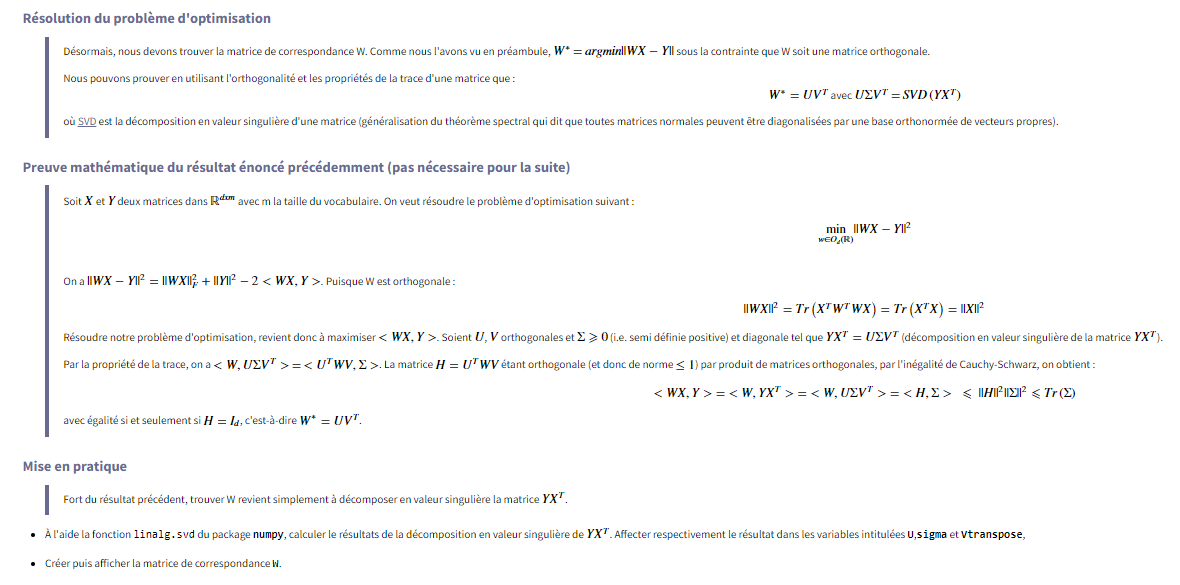

In [ ]:
U, sigma, Vtranspose = np.linalg.svd(Y.dot(X.T))
W = U.dot(Vtranspose)        
W

## 3. Traduction d'un mot 
Une fois la matrice W obtenue, nous pouvons désormais trouver la traduction en anglais de n'importe quel mot présent dans le vocabulaire français. Cela consistera à identifier les plus proches voisins de la projection.

Exécuter le code suivant qui définit la fonction get_closest_english_words retournant les k mots anglais les plus proches (et leur probabilité) de la traduction du mot français fournie en entrée.

In [ ]:
def get_closest_english_words(fr_word, k):
        '''
        Inputs:
        - fr_word : mot en français
        - k : réel
        
        Output:
        -renvoie les k mots les plus proches dans la traduction
        '''
        fr_obj = fr_word2vec.encode(fr_word)
        aligne_fr = W.dot(fr_obj.T)
        en_embeds = en_word2vec.embeddings
        norm_prod = np.linalg.norm(aligne_fr)*np.linalg.norm(en_embeds, axis=1) 
        scores = en_embeds.dot(aligne_fr) / norm_prod 
        best_k = np.flip(np.argsort(scores))[:k]
        return ([en_word2vec.words[idx] for idx in best_k], [scores[idx] for idx in best_k])
    
get_closest_english_words('voiture', 5)

Tester la fonction get_closest_english_words en affichant les 3 termes anglais les plus proches (et leur probabilité) de la liste de mots suivante : ['chat', 'araignée', 'chaussure', 'zut'].

In [ ]:
fr_words = ['chat', 'araignée', 'chaussure', 'zut']
k = 3
for fr_word in fr_words:
    print('-' * 10)
    print(f'fr: "{fr_word}"')
    translate = get_closest_english_words(fr_word, k=3)
    translate_words = translate[0]
    translate_scores = translate[1]
    for idx in range(len(translate_words)) :
        print(f'en: "{translate_words[idx]}"',translate_scores[idx])

Comme nous pouvons le constater, cet algorithme est assez performant et peut servir de traducteur de mots français-anglais.

## Visualisation de l'espace d'embeddings de mots multilingues
Pour rappel, l'une des approches les plus courantes pour visualiser un word embedding repose sur l'analyse en composantes principales (ACP). En effet, les premières dimensions de l'ACP encodent la plus grande partie de la variabilité de l'ensemble d'origine. Par conséquent, en n'utilisant que les deux premières composantes principales, il est possible de visualiser le word embedding dans un graphe.

Exécuter le code suivante pour visualiser la correspondance et la proximité entre les mots français et anglais.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

nmax = 50000

fr_words, fr_embeddings = fr_word2vec.load_wordvec(filepath=fr_embeddings_path, vocab_size=nmax)
en_words, en_embeddings = en_word2vec.load_wordvec(filepath=en_embeddings_path, vocab_size=nmax)

pca = PCA(n_components=2, whiten=True)  
pca.fit(np.vstack([fr_embeddings, en_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())


def plot_similar_word(W,fr_words, fr_word2id, fr_emb, en_words, en_word2id, en_emb, pca):

    Y = []
    word_labels = []
    for fw in fr_words:
        Y.append(fr_emb[fr_word2id[fw]].dot(W.transpose()))
        word_labels.append(fw)
    for ew in en_words:
        Y.append(en_emb[en_word2id[ew]])
        word_labels.append(ew)

    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(fr_words) else 'red'  # fr_words en bley / en_words en rouge
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Espace embeddings de mots multilingues')

    plt.show()
    

fr_words = ['histoire', 'recherche', 'conférence']
en_words = ['history', 'research', 'conference']
W=W
fr_emb = fr_embeddings
en_emb = en_embeddings

fr_word2id = fr_word2vec.word2id
en_word2id = en_word2vec.word2id

# Insérer les mots aux dictionnaires
for fw in fr_words:
    assert fw in fr_word2id, '"%s" not in source dictionary' % fw
for ew in en_words:
    assert ew in en_word2id, '"%s" not in target dictionary' % fw

# Application de la fonction     
plot_similar_word(W,fr_words, fr_word2id, fr_embeddings, en_words, en_word2id, en_embeddings, pca)

Essayons maintenant d'utiliser ce genre d'algorithme pour traduire tout un texte. L'algorithme consistera à traduire mot à mot les termes de la phrase.

En vous inspirant de la fonction get_closest_english_words, créer une fonction get_closest_english_sentences pour traduire mot à mot la phrase suivante : 'Cet algorithme permet de traduire un texte français en anglais mais possède une faible performance.'.

In [ ]:
from nltk.tokenize import word_tokenize

def get_closest_english_sentences(fr_sentence):
        '''
        Inputs:
        - sentence : phrase en français
        
        Output:
        - renvoie la phrase correspondant à la traduction la plus proche.
        '''
        list_fr_word = word_tokenize(fr_sentence, language='french')
        translate = []
        for i in range(len(list_fr_word)) :
            
            fr_obj = fr_word2vec.encode(list_fr_word[i])
            aligne_fr = W.dot(fr_obj)
            en_embeds = en_word2vec.embeddings
            norm_prod = np.linalg.norm(aligne_fr)*np.linalg.norm(en_embeds, axis=1)
            scores = en_embeds.dot(aligne_fr) / norm_prod
            best_word = np.flip(np.argsort(scores))[0]
            translate.append(en_word2vec.words[best_word])
        return (" ".join(translate))
    
sent = 'Cet algorithme permet de traduire un texte français en anglais mais possède une faible performance.'
sent_translate = get_closest_english_sentences(sent)
print(sent_translate)

Compte tenu de la différence de structure linguistique entre le français et l'anglais (par exemple l'ordre nom-adjectif en français, adjectif-nom en anglais), la traduction mot à mot n'est pas optimale. De plus, nous pouvons remarquer que notre algorithme de traduction ne fonctionne pas pour les mots tels que : de, en, un, une, etc.

## Conclusion
Comme nous pouvions nous en douter, la traduction mot à mot n'est pas la méthode la plus performante pour traduire un texte. Une des solutions possibles serait d'utiliser une approche Seq2seq dont un module lui étant consacré est déjà disponible sur la plateforme.



Pour résumer, dans cet exercice, nous avons :

Créer les matrices d'embeddings X et Y constituées des embeddings des mots présents dans le dictionnaire bilingue.

Trouver la matrice de correspondance W en résolvant un problème d'optimisation.

Déterminer les plus proches voisins des mots sources dans l'espace de mots cible.

Utiliser cette méthode de traduction de mots pour créer un traducteur de texte.